In [2]:
### price list
from helpers.prices import load_pulse, show_pline
from helpers.prices import extract_pline

from helpers.skus import show_sku_by_id

from indexes.verified import get_sku_row_by_verifed

### Zones

from zones.common import handle_zones, flat_zones, add_lists, show_res

### Verified

from indexes.verified import show_verified
from indexes.company import add_terms_docs

In [3]:
from index import get_sources
from indexes.company import build_skus_by_company_row
from indexes.forms import build_dosage_row_docs

%time verified, plist, idx = get_sources()


# by dosage row get all docs(skus) where meeted
%time skus_by_dosage_row = build_dosage_row_docs(idx)

# by company row get lists of skus
%time skus_by_company_row = build_skus_by_company_row(idx)

# CPU times: user 4.13 s, sys: 408 ms, total: 4.54 s
# Wall time: 6.31 s
# CPU times: user 18.6 s, sys: 79.5 ms, total: 18.7 s
# Wall time: 18.8 s
# CPU times: user 4.7 s, sys: 19.3 ms, total: 4.72 s
# Wall time: 4.73 s

CPU times: user 4.37 s, sys: 420 ms, total: 4.79 s
Wall time: 5.91 s
CPU times: user 18 s, sys: 74.2 ms, total: 18.1 s
Wall time: 18.1 s
CPU times: user 4.61 s, sys: 21.8 ms, total: 4.63 s
Wall time: 4.65 s


In [10]:
verified_items = list(verified.items())

In [52]:
def display_info():
    res_plot = list()
    for i, (price_i, un_id) in enumerate(verified_items):
        print('\n ############')
        pname, pcompany = extract_pline(price_i, plist)

        zones = handle_zones(pname, pcompany, idx)
        flats = flat_zones(zones, skus_by_dosage_row=skus_by_dosage_row, skus_by_company_row=skus_by_company_row) # tn_zone, dosage_zone, company_zone = zones
        flat_skus_tn, flat_skus_dosage, flat_skus_c = flats

        # price
        show_pline(i, price_i, plist)
        # verified
        # show_sku_by_id(un_id, idx)
        show_verified(price_i, verified, flats, idx)

        results = add_lists([flat_skus_tn, flat_skus_dosage, flat_skus_c], [0.5, 0.4, 0.1])
        sku_row = get_sku_row_by_id(un_id, idx)
        print('---')
        show_res(results, sku_row, idx)
        # for plot
        index = get_index(results, sku_row)
        res_plot.append((price_i, index))

    


 ############
0. [39]
P: 5-Нок табл. 50 мг х50 [Lek – Вектор]
[a4fb182c-9d71-4d62-a405-70947f1dcc4e]
[5-нок] [93090] => True
[['таблетки, покрытые оболочкой']] [[1225]] => True
[ЛЕК] [2696] => True
---
--->  0 93090 1.0 [5-нок] [таблетки, покрытые оболочкой] [ЛЕК] [93090] []
1 20653 0.9 [корвитол 50] [таблетки] [БЕРЛИН-КЕМИ АГ] [20653] []
2 32225 0.9 [l-тироксин 50 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [32225] []
3 36884 0.9 [l-тироксин 50 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [36884] []
4 36953 0.9 [корвитол 50] [таблетки] [БЕРЛИН-КЕМИ АГ] [36953] []
5 71745 0.9 [корвитол 50] [таблетки] [БЕРЛИН-КЕМИ АГ] [71745] []
6 83973 0.9 [l-тироксин 50 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [83973] []
7 54128 0.5 [индометацин 50 берлин-хеми] [суппозитории ректальные] [БЕРЛИН-КЕМИ АГ] [54128] []
8 57125 0.5 [хумалог микс 50] [суспензия для подкожного введения] [ЛИЛЛИ ФРАНЦЕ] [57125] []
9 82734 0.5 [индометацин 50 берлин-хеми] [суппозитории ректальные] [БЕРЛИН-КЕМИ АГ] [82734] []

 #######

---
0 9693 3.3 [9 месяцев фолиевая кислота] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [9693] []
1 43359 3.3 [9 месяцев фолиевая кислота] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [43359] []
--->  2 127419 3.3 [9 месяцев фолиевая кислота] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [127419] []
3 38658 2.3 [9 месяцев витаминно-минеральный комплекс] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [38658] []
4 122443 2.3 [9 месяцев витаминно-минеральный комплекс] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [122443] []
5 68295 2.3 [фолиевая кислота] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [68295] []
6 143459 2.3 [фолиевая кислота] [таблетки, покрытые плёночной оболочкой] [ВАЛЕНТА ФАРМАЦЕВТИКА] [143459] []
7 2209 1.7000000000000002 [тиоктовая кислота] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [2209] []
8 7495 1.7000000000000002 [тиоктовая кислота] [таблетки, покры

8 71027 1.5 [l-тироксин 150 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [71027] []
9 73901 1.5 [l-тироксин 125 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [73901] []

 ############
19. [826]
P: L-Тироксин-Акри табл. 100 мкг х100 [Акрихин]
[1dda9225-41c5-49f0-9192-6c40faa1290a]
[l-тироксин-акри] [16701] => True
[['таблетки']] [[61]] => True
[АКРИХИН] [1794] => True
---
--->  0 16701 1.0 [l-тироксин-акри] [таблетки] [АКРИХИН] [16701] []
1 86692 1.0 [l-тироксин-акри] [таблетки] [АКРИХИН] [86692] []
2 104238 1.0 [l-тироксин-акри] [таблетки] [АКРИХИН] [104238] []
3 131334 1.0 [l-тироксин-акри] [таблетки] [АКРИХИН] [131334] []
4 1065 0.9 [йодомарин 100] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [1065] []
5 4056 0.9 [l-тироксин 100 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [4056] []
6 4496 0.9 [ацц 100] [таблетки шипучие] [ХЕРМЕС АРЗНЕЙМИТТЕЛ] [4496] []
7 7470 0.9 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [7470] []
8 10794 0.9 [ацц 100] [таблетки шипучие] [ХЕРМЕС ФА

---
0 56500 1.5000000000000002 [авелокс] [раствор для инфузий] [БАЙЕР АГ] [56500] []
1 89496 1.5000000000000002 [авелокс] [раствор для инфузий] [БАЙЕР АГ] [89496] []
--->  2 123795 1.5000000000000002 [авелокс] [раствор для инфузий] [БАЙЕР АГ] [123795] []
3 93391 1.3 [авелокс] [раствор для инфузий] [ЗАВОД МЕДСИНТЕЗ] [93391] []
4 132871 1.3 [авелокс] [раствор для инфузий] [ЗАВОД МЕДСИНТЕЗ] [132871] []
5 137152 1.3 [авелокс] [раствор для инфузий] [ЗАВОД МЕДСИНТЕЗ] [137152] []
6 89899 1.2000000000000002 [ципробай] [раствор для инфузий] [БАЙЕР ШЕРИНГ ФАРМА] [89899] []
7 100656 1.2000000000000002 [ципробай] [раствор для инфузий] [БАЙЕР ШЕРИНГ ФАРМА] [100656] []
8 9654 1.1 [эрбитукс] [раствор для инфузий] [БЕРИНГЕР ИНГЕЛЬХАЙМ ФАРМА] [9654] []
9 14506 1.1 [эрбитукс] [раствор для инфузий] [БЕРИНГЕР ИНГЕЛЬХАЙМ ФАРМА] [14506] []

 ############
30. [1689]
P: Авелокс табл. п/о плен 400 мг х5 [Bayer AG]
[1c14ec33-7f4b-4145-96ee-c57026bc7d04]
[авелокс] [15718] => True
[['таблетки, покрытые плёночной 

---
0 62687 4.8 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 2.4 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
--->  2 24276 2.3000000000000003 [авонекс] [раствор для внутримышечного введения] [ВЕТТЕР ФАРМА-ФЕРТИГУНГ] [24276] []
3 82772 2.3000000000000003 [авонекс] [раствор для внутримышечного введения] [ВЕТТЕР ФАРМА-ФЕРТИГУНГ] [82772] []
4 332 2.0 [флуфеназин] [раствор для внутримышечного введения, [масляный]] [Р-ФАРМ] [332] []
5 5121 2.0 [клопиксол-акуфаз] [раствор для внутримышечного введения, [масляный]] [Х. ЛУНДБЕЦК] [5121] []
6 5823 2.0 [синэстрол] [раствор для внутримышечного введения, [масляный]] [ДАЛЬХИМФАРМ] [5823] []
7 6764 2.0 [модитен депо] [раствор для внутримышечного введения, [масляный]] [БРИСТОЛ-МАЙЕРС СКВИББ] [6764] []
8 14452 2.0 [синэстрол] [раствор для внутримышечного введения,

---
0 4199 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [4199] []
1 7676 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [7676] []
2 8212 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [8212] []
3 15516 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [15516] []
--->  4 18661 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [18661] []
5 24128 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [24128] []
6 40992 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [40992] []
7 71725 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [71725] []
8 92624 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [92624] []
9 119548 1.9000000000000004 [адемпас] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [11954

---
0 32300 1.9000000000000004 [аджисепт] [таблетки для рассасывания, [ананасовые]] [АДЖИО ФАРМАСЬЮТИКАЛС] [32300] []
--->  1 73709 1.9000000000000004 [аджисепт] [таблетки для рассасывания, [ананасовые]] [АДЖИО ФАРМАСЬЮТИКАЛС] [73709] []
2 744 1.5000000000000002 [аджисепт] [таблетки для рассасывания, [медово-лимонные]] [АДЖИО ФАРМАСЬЮТИКАЛС] [744] []
3 70065 1.5000000000000002 [аджисепт] [таблетки для рассасывания, [апельсиновые]] [АДЖИО ФАРМАСЬЮТИКАЛС] [70065] []
4 77114 1.5000000000000002 [аджисепт] [таблетки для рассасывания, [лимонные]] [АДЖИО ФАРМАСЬЮТИКАЛС] [77114] []
5 115854 1.5000000000000002 [аджисепт] [таблетки для рассасывания, [лимонные]] [АДЖИО ФАРМАСЬЮТИКАЛС] [115854] []
6 118184 1.5000000000000002 [аджисепт] [таблетки для рассасывания, [медово-лимонные]] [АДЖИО ФАРМАСЬЮТИКАЛС] [118184] []
7 122015 1.5000000000000002 [аджисепт] [таблетки для рассасывания, [ментолово-эвкалиптовые]] [АДЖИО ФАРМАСЬЮТИКАЛС] [122015] []
8 129816 1.5000000000000002 [аджисепт] [таблетки для рас

---
--->  0 4323 1.5000000000000002 [адонис-бром] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [4323] []
1 93975 1.5000000000000002 [адонис-бром] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [93975] []
2 131036 1.5000000000000002 [адонис-бром] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [131036] []
3 17665 1.3 [адонис-бром] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [17665] []
4 28778 1.3 [адонис-бром] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [28778] []
5 29310 1.0 [нистатин] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [29310] []
6 31690 1.0 [нистатин] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [31690] []
7 39186 1.0 [аминалон] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [39186] []
8 51323 1.0 [аминалон] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [51323] []
9 85829 1.0 [нистатин] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [85829] []

 ############
65. [1882]
P: Адонис-Бром табл. п/о х25 [Борисовский завод]
[a680a71e-409c-4740-b870-7825863a37fe]
[а

---
--->  0 75210 1.1 [адуцил] [таблетки] [ПОЛФА ПАБЯНИЦКИ ЗАКЛАДЫ ФАРМАСЬЮТИШНЕ] [75210] []
1 89612 1.1 [адуцил] [таблетки] [ПОЛФА ПАБЯНИЦКИ ЗАКЛАДЫ ФАРМАСЬЮТИШНЕ] [89612] []
2 111476 1.1 [адуцил] [таблетки] [ПОЛФА ПАБЯНИЦКИ ЗАКЛАДЫ ФАРМАСЬЮТИШНЕ] [111476] []
3 136617 1.1 [адуцил] [таблетки] [ПОЛФА ПАБЯНИЦКИ ЗАКЛАДЫ ФАРМАСЬЮТИШНЕ] [136617] []
4 1065 0.9 [йодомарин 100] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [1065] []
5 4056 0.9 [l-тироксин 100 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [4056] []
6 7470 0.9 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [7470] []
7 13828 0.9 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [13828] []
8 18068 0.9 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [18068] []
9 24193 0.9 [корвитол 100] [таблетки] [БЕРЛИН-КЕМИ АГ] [24193] []

 ############
73. [1894]
P: Адуцил табл 50 мг х60 [Pabianickie Zaklady Farmaceutycczne Polfa S.A. Poland]
[c601b912-5c21-

---
--->  0 3204 1.0 [азалептин] [таблетки] [ОРГАНИКА] [3204] []
1 10472 1.0 [азалептин] [таблетки] [ОРГАНИКА] [10472] []
2 14850 1.0 [азалептин] [таблетки] [ОРГАНИКА] [14850] []
3 29604 1.0 [азалептин] [таблетки] [ОРГАНИКА] [29604] []
4 93185 1.0 [азалептин] [таблетки] [ОРГАНИКА] [93185] []
5 142651 1.0 [азалептин] [таблетки] [ОРГАНИКА] [142651] []
6 1065 0.9 [йодомарин 100] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [1065] []
7 4056 0.9 [l-тироксин 100 берлин-хеми] [таблетки] [БЕРЛИН-КЕМИ АГ] [4056] []
8 4496 0.9 [ацц 100] [таблетки шипучие] [ХЕРМЕС АРЗНЕЙМИТТЕЛ] [4496] []
9 7470 0.9 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [7470] []

 ############
82. [1922]
P: Азалептин табл. 25 мг х50 [Органика]
[fe32405c-90a4-4181-add2-6215f050002d]
[азалептин] [142651] => True
[['таблетки']] [[61]] => True
[ОРГАНИКА] [104] => True
---
0 3204 1.0 [азалептин] [таблетки] [ОРГАНИКА] [3204] []
1 10472 1.0 [азалептин] [таблетки] [ОРГАНИКА] [10472] []
2 14850 1.0 [азал

6 4612 0.5 [аминоплазмаль е 15] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [4612] []
7 65633 0.5 [гомеопатические монокомпонентные препараты животного происхождения (15 наименований - согласно приложению)] [гранулы гомеопатические] [ГМСЦ] [65633] []
8 101934 0.5 [аминоплазмаль е 15] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [101934] []
9 120566 0.5 [гомеопатические монокомпонентные препараты животного происхождения (15 наименований - согласно приложению)] [гранулы гомеопатические] [ГМСЦ] [120566] []

 ############
92. [1936]
P: Азелик гель д/наруж. пр. 15 % 30 г. х1 АКЦИЯ пакет (5) [Акрихин]
[6e17c72f-f31c-4dc0-b54a-5a067ff4de09]
[азелик] [62207] => True
[['гель для наружного применения']] [[1179]] => True
[АКРИХИН] [1794] => True
---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 1.6 [колдфри] [таблетки [дневны

---
0 62687 1.6 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
--->  1 66069 1.3000000000000003 [азикс-дерм] [крем для наружного применения] [РАНБАКСИ ЛАБОРАТОРИЕС] [66069] []
2 73018 1.1 [азикс-дерм] [крем для наружного применения] [САН ФАРМАСЬЮТИКАЛ ИНДАСТРИЕС] [73018] []
3 3487 0.9 [изнель 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [3487] []
4 9994 0.9 [линдинет 30] [таблетки, покрытые оболочкой] [ГЕДЕОН РИХТЕР] [9994] []
5 24298 0.9 [изнель 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [24298] []
6 32847 0.9 [мануэль 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [32847] []
7 42613 0.9 [изнель 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [42613] []
8 46890 0.9 [зокардис 30] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [46890] []
9 64667 0.9 [линдинет 30] [таблетки, покрыты

P: Азитромицин капс. 250 мг х6 [Озон]
[36693cde-2678-4bc2-8faf-c728c71e9867]
[азитромицин] [30521] => True
[['капсулы']] [[714]] => True
[ОЗОН] [2904] => True
---
0 223 1.0 [азитромицин] [капсулы] [ОЗОН] [223] []
1 3588 1.0 [азитромицин] [капсулы] [ОЗОН] [3588] []
2 5120 1.0 [азитромицин] [капсулы] [ОЗОН] [5120] []
3 5211 1.0 [азитромицин] [капсулы] [ОЗОН] [5211] []
4 5631 1.0 [азитромицин] [капсулы] [ОЗОН] [5631] []
5 7678 1.0 [азитромицин] [капсулы] [ОЗОН] [7678] []
6 9080 1.0 [азитромицин] [капсулы] [ОЗОН] [9080] []
7 9447 1.0 [азитромицин] [капсулы] [ОЗОН] [9447] []
8 10441 1.0 [азитромицин] [капсулы] [ОЗОН] [10441] []
9 10585 1.0 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [10585] []

 ############
109. [1958]
P: Азитромицин капс. 250 мг х6 [ПроМед]
[6ab8fcfb-c408-4b26-8a1a-c382b730a9ce]
[азитромицин-акрихин] [60354] => False
[['таблетки, покрытые плёночной оболочкой']] [[1434]] => True
[МИКРО ЛАБС] [3487] => True
---
0 223 0.9 [азитромицин] [капсулы] [ОЗОН] [223

---
0 10585 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [10585] []
1 16173 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [16173] []
2 17619 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [17619] []
3 17863 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [17863] []
4 18004 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [18004] []
5 20590 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [20590] []
6 26093 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [26093] []
7 37145 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [37145] []
8 41683 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [41683] []
9 45081 1.8000000000000003 [азитромицин] [таблетки, покрытые плёночной оболочкой] [ОЗОН] [45081]

---
0 898 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [898] []
1 3710 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [3710] []
2 7268 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [7268] []
3 11465 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [11465] []
4 11972 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [11972] []
5 12137 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [12137] []
6 13608 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [13608] []
7 16395 1.8000000000000003 [азурикс] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВ

---
0 21834 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [РОТТЕНДОРФ ФАРМА] [21834] []
1 30419 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой] [РОТТЕНДОРФ ФАРМА] [30419] []
2 49966 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [РОТТЕНДОРФ ФАРМА] [49966] []
3 59975 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [РОТТЕНДОРФ ФАРМА] [59975] []
4 61909 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [МЕРЦ ФАРМА] [61909] []
--->  5 66619 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [РОТТЕНДОРФ ФАРМА] [66619] []
6 69409 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [МЕРЦ ФАРМА] [69409] []
7 84558 2.4 [акатинол мемантин] [таблетки, покрытые плёночной оболочкой] [РОТТЕНДОРФ ФАРМА] [84558] []
8 87120 2.4 [акатинол мемантин] [таблетки, покрытые плёночной

---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 21262 2.0 [аква марис стронг] [спрей для местного применения] [Ядран-галенски лэборатори] [21262] []
--->  2 132482 2.0 [аква марис стронг] [спрей назальный] [Ядран-галенски лэборатори] [132482] []
3 4230 1.9 [аква марис] [капли назальные [для детей]] [Ядран-галенски лэборатори] [4230] []
4 72888 1.6 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
5 14359 1.5 [аква марис] [спрей назальный дозированный] [Ядран-галенски лэборатори] [14359] []
6 89360 1.5 [аква марис плюс] [спрей назальный] [Ядран-галенски лэборатори] [89360] []
7 615 1.3 [олмакс стронг] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [615] []
8 17405 1.3 [олмакс стронг] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [17405] []
9 30713 1.3 [олмакс стронг] [табл

---
--->  0 30676 2.0000000000000004 [аккузид] [таблетки, покрытые плёночной оболочкой] [ПФАЙЗЕР МЭНУФЕКЧУРИНГ ДОЙЧЛАНД] [30676] []
1 51958 2.0000000000000004 [аккузид] [таблетки, покрытые плёночной оболочкой] [ПФАЙЗЕР МЭНУФЕКЧУРИНГ ДОЙЧЛАНД] [51958] []
2 106223 2.0000000000000004 [аккузид] [таблетки, покрытые плёночной оболочкой] [ПФАЙЗЕР МЭНУФЕКЧУРИНГ ДОЙЧЛАНД] [106223] []
3 7726 1.7000000000000002 [кардосал 20] [таблетки, покрытые плёночной оболочкой] [ДАИИЧИ САНКИО ЕУРОПЕ] [7726] []
4 11380 1.7000000000000002 [леркамен 20] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [11380] []
5 56034 1.7000000000000002 [леркамен 20] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [56034] []
6 63930 1.7000000000000002 [леркамен 20] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [63930] []
7 65075 1.7000000000000002 [леркамен 20] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [65075] []
8 70846 1.7000000000000002 [леркамен 20] [таблетки, покрытые плёночн

---
0 23274 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [23274] []
1 57329 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [57329] []
--->  2 58900 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [58900] []
3 72782 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [72782] []
4 74390 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [74390] []
5 101769 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [101769] []
6 130689 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [130689] []
7 131417 1.9000000000000004 [акорта] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [131417] []
8 137125 1.9000000000000004 [акорта] [таблетки, покрытые

---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 1.6 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
2 7841 1.5 [акридерм гк] [мазь для наружного применения] [АКРИХИН] [7841] []
3 21856 1.5 [акридерм гк] [крем для наружного применения] [АКРИХИН] [21856] []
4 78189 1.5 [акридерм гк] [мазь для наружного применения] [АКРИХИН] [78189] []
--->  5 102471 1.5 [акридерм гк] [крем для наружного применения] [АКРИХИН] [102471] []
6 3487 1.3 [изнель 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [3487] []
7 9994 1.3 [линдинет 30] [таблетки, покрытые оболочкой] [ГЕДЕОН РИХТЕР] [9994] []
8 24298 1.3 [изнель 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [24298] []
9 32847 1.3 [мануэль 30] [таблетки, покрытые плёночной оболочкой] [ЛЮПИН] [32847] []

 ############
174. [2205]
P

---
0 26404 1.0 [акридилол] [таблетки] [АКРИХИН] [26404] []
--->  1 28243 1.0 [акридилол] [таблетки] [АКРИХИН] [28243] []
2 39707 1.0 [акридилол] [таблетки] [АКРИХИН] [39707] []
3 59129 1.0 [акридилол] [таблетки] [АКРИХИН] [59129] []
4 112941 1.0 [акридилол] [таблетки] [АКРИХИН] [112941] []
5 25987 0.9 [курантил 25] [таблетки, покрытые оболочкой] [БЕРЛИН-КЕМИ АГ] [25987] []
6 38987 0.9 [дексалгин 25] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [38987] []
7 40768 0.9 [дексалгин 25] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [40768] []
8 76157 0.9 [дексалгин 25] [таблетки, покрытые плёночной оболочкой] [ЛАБОРАТОРИОС МЕНАРИНИ] [76157] []
9 77156 0.9 [курантил n 25] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-ФАРМА] [77156] []

 ############
186. [2218]
P: Акриол Про крем д/мест. и наруж прим. 2,5%+2,5% 30 х1 [Акрихин]
[c725b132-e72f-4ed5-b2bb-2ac60167ae00]
[акриол про] [112102] => True
[['крем для местно

---
0 3859 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [3859] []
1 5081 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [5081] []
2 8816 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [8816] []
3 14349 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [14349] []
4 17102 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [17102] []
5 18925 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [18925] []
6 20354 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [20354] []
7 22204 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [22204] []
8 23929 1.9000000000000004 [актапароксетин] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [23929] []
9 24607 1.9000000000000004 [актапароксетин] [таб

---
0 21319 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [21319] []
1 35287 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [35287] []
2 36364 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [36364] []
3 54391 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [54391] []
4 65282 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [65282] []
5 73379 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [73379] []
--->  6 112144 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [112144] []
7 129299 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [129299] []
8 131961 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [131961] []
9 22070 1.4000000000000001 [актовегин] [раствор для инъекций] [СОТЕКС] [22070] []

 ############
205. [2264]
P:

---
0 21319 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [21319] []
1 35287 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [35287] []
--->  2 36364 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [36364] []
3 54391 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [54391] []
4 65282 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [65282] []
5 73379 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [73379] []
6 112144 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [112144] []
7 129299 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [129299] []
8 131961 1.6000000000000003 [актовегин] [раствор для инъекций] [ТАКЕДА ФАРМАСЬЮТИКАЛС] [131961] []
9 22070 1.4000000000000001 [актовегин] [раствор для инъекций] [СОТЕКС] [22070] []

 ############
213. [2272]
P:

---
0 67075 1.4000000000000001 [алексан] [раствор для инъекций] [ЕБЕВЕ ФАРМА] [67075] []
--->  1 105808 1.4000000000000001 [алексан] [раствор для инъекций] [ЕБЕВЕ ФАРМА] [105808] []
2 109384 1.4000000000000001 [алексан] [раствор для инъекций] [ЕБЕВЕ ФАРМА] [109384] []
3 139891 1.4000000000000001 [алексан] [раствор для инъекций] [ЕБЕВЕ ФАРМА] [139891] []
4 8492 0.9 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [8492] []
5 20498 0.9 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [20498] []
6 26514 0.9 [тетраспан 10] [раствор для инфузий] [Б.БРАУН МЕДИКАЛ АГ] [26514] []
7 30801 0.9 [тетраспан 10] [раствор для инфузий] [Б.БРАУН МЕДИКАЛ АГ] [30801] []
8 33786 0.9 [тетраспан 10] [раствор для инфузий] [Б.БРАУН МЕДИКАЛ АГ] [33786] []
9 35501 0.9 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [35501] []

 ############
225. [2311]
P: Алексан р-р д/инъек. 50 мг/мл 20 мл х1 [Ebewe]
[76dc030b-2ec9-4689-bacb-715cec101f3b]
[алексан] [67075] => True
[['раствор для инъекций']]

---
0 4548 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [4548] []
--->  1 24747 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [24747] []
2 47221 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [47221] []
3 85702 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [85702] []
4 96115 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [96115] []
5 103282 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [103282] []
6 121451 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [121451] []
7 123005 1.8000000000000003 [алзепил] [таблетки, покрытые плёночной оболочкой] [ЕГИС ФАРМАСЬЮТИКАЛС] [123005] []
8 22075 1.7000000000000002 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНД

---
0 70086 1.6 [глутаргин алкоклин] [таблетки] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [70086] []
--->  1 120631 1.6 [глутаргин алкоклин] [таблетки] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [120631] []
2 83607 1.2000000000000002 [глутаргин алкоклин] [порошок для приготовления раствора для приёма внутрь] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [83607] []
3 111359 1.2000000000000002 [глутаргин алкоклин] [порошок для приготовления раствора для приёма внутрь] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [111359] []
4 137935 1.2000000000000002 [глутаргин алкоклин] [порошок для приготовления раствора для приёма внутрь] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [137935] []
5 138265 1.2000000000000002 [глутаргин алкоклин] [порошок для приготовления раствора для приёма внутрь] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [138265] []
6 25361 1.1 [глутаргин] [таблетки] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [25361] []
7 48182 1.1 [глутаргин] [таблетки] [ФАРМАЦЕВТИЧЕНА КОМПАНИЯ ЗДОРОВЬЯ] [48182] []
8 89526 1.1 [глутаргин] [таблетки] [ФАРМАЦЕВ

---
0 75899 1.4000000000000001 [аллегра] [таблетки, покрытые плёночной оболочкой] [САНОФИ-СИНТЕЛАБО (ИНДИЯ)] [75899] []
--->  1 94803 1.4000000000000001 [аллегра] [таблетки, покрытые плёночной оболочкой] [САНОФИ-СИНТЕЛАБО (ИНДИЯ)] [94803] []
2 7777 1.3 [аллегра] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС США] [7777] []
3 31420 1.3 [аллегра] [таблетки, покрытые плёночной оболочкой] [САНОФИ ВИНТРОП ИНДАСТРИ] [31420] []
4 78136 1.3 [аллегра] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС США] [78136] []
5 89667 1.3 [аллегра] [таблетки, покрытые плёночной оболочкой] [САНОФИ ВИНТРОП ИНДАСТРИ] [89667] []
6 58 0.8 [простанорм] [таблетки, покрытые оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [58] []
7 68 0.8 [эфевелон] [таблетки, покрытые оболочкой] [АКТАВИС] [68] []
8 523 0.8 [аллохол] [таблетки, покрытые оболочкой] [БЕЛМЕДПРЕПАРАТЫ] [523] []
9 596 0.8 [телектол] [таблетки, покрытые оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [596] []

 ############
255. [2395]
P: А

---
0 36043 2.3000000000000003 [аллохол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [36043] []
1 64677 2.3000000000000003 [аллохол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [64677] []
2 74341 2.3000000000000003 [аллохол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [74341] []
--->  3 113669 2.3000000000000003 [аллохол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [113669] []
4 4159 2.1 [аллохол] [таблетки, покрытые плёночной оболочкой] [ПФК ОБНОВЛЕНИЕ] [4159] []
5 20118 2.1 [аллохол] [таблетки, покрытые плёночной оболочкой] [БОРЩАГОВСКИЙ ХИМИКО-ФАРМАЦЕВТИЧНИЙ ЗАВОД] [20118] []
6 25546 2.1 [аллохол] [таблетки, покрытые плёночной оболочкой] [БОРЩАГОВСКИЙ ХИМИКО-ФАРМАЦЕВТИЧНИЙ ЗАВОД] [25546] []
7 27065 2.1 [аллохол] [таблетки, покрытые плёночной оболочкой] [ПФК ОБНОВЛЕНИЕ] [27065] []
8 90412 2.1 [аллохол] [таблетки, покрытые плёночной оболочкой] [ПФК ОБНОВЛЕНИЕ] [90412] []
9 100323 2.1 [а

---
0 21546 1.4000000000000001 [аллохол] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [21546] []
1 22034 1.4000000000000001 [аллохол] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [22034] []
2 42640 1.4000000000000001 [аллохол] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [42640] []
3 92554 1.4000000000000001 [аллохол] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [92554] []
--->  4 124066 1.4000000000000001 [аллохол] [таблетки, покрытые оболочкой] [ВИФИТЕХ] [124066] []
5 523 1.3 [аллохол] [таблетки, покрытые оболочкой] [БЕЛМЕДПРЕПАРАТЫ] [523] []
6 923 1.3 [аллохол] [таблетки, покрытые оболочкой] [МОСХИМФАРМПРЕПАРАТЫ ИМ. Н.А. СЕМАШКО] [923] []
7 4159 1.3 [аллохол] [таблетки, покрытые плёночной оболочкой] [ПФК ОБНОВЛЕНИЕ] [4159] []
8 7184 1.3 [аллохол] [таблетки, покрытые оболочкой] [МОСХИМФАРМПРЕПАРАТЫ ИМ. Н.А. СЕМАШКО] [7184] []
9 9037 1.3 [аллохол] [таблетки, покрытые оболочкой] [ИРБИТСКИЙ ХФЗ] [9037] []

 ############
274. [2422]
P: Аллохол табл. п/о х50 [Ирбитский химико-фармацевтический завод]
[4ce

---
--->  0 13754 1.5000000000000002 [алмонт] [таблетки жевательные] [АКТАВИС] [13754] []
1 58410 1.5000000000000002 [алмонт] [таблетки жевательные] [АКТАВИС] [58410] []
2 71644 1.5000000000000002 [алмонт] [таблетки жевательные] [АКТАВИС] [71644] []
3 90447 1.5000000000000002 [алмонт] [таблетки жевательные] [АКТАВИС] [90447] []
4 94533 1.5000000000000002 [алмонт] [таблетки жевательные] [АКТАВИС] [94533] []
5 123308 1.5000000000000002 [алмонт] [таблетки жевательные] [АКТАВИС] [123308] []
6 76186 1.1 [алмонт] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [76186] []
7 90238 1.1 [алмонт] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [90238] []
8 112966 1.1 [алмонт] [таблетки, покрытые плёночной оболочкой] [АКТАВИС] [112966] []
9 21159 0.9 [фосренол] [таблетки жевательные] [ХАМОЛ] [21159] []

 ############
286. [2437]
P: Алмонт табл. жев. 4 мг х98 [Actavis Ltd]
[674f5220-c8f8-4f23-b1eb-2aea47857d1d]
[алмонт] [58410] => True
[['таблетки жевательные']] [[1059]] => True
[АКТАВИС] [21

---
--->  0 49930 2.0 [алоэ экстракт жидкий] [раствор для подкожного введения] [ЕРХФФ] [49930] []
1 42329 1.9 [алоэ экстракт жидкий] [раствор для подкожного введения] [ДАЛЬХИМФАРМ] [42329] []
2 49021 1.9 [алоэ экстракт жидкий] [раствор для подкожного введения] [ДАЛЬХИМФАРМ] [49021] []
3 61441 1.9 [алоэ экстракт жидкий] [раствор для подкожного введения] [ВИФИТЕХ] [61441] []
4 62543 1.9 [алоэ экстракт жидкий] [раствор для подкожного введения] [ВИФИТЕХ] [62543] []
5 26637 1.5 [вакцина полиомиелитная пероральная 1, 2, 3 типов] [раствор для приёма внутрь] [ФГБНУ ФЕДЕРАЛЬНЫЙ НАУЧНЫЙ ЦЕНТР ИССЛЕДОВАНИЙ И РАЗРАБОТКИ ИММУНОБИОЛОГИЧЕСКИХ ПРЕПАРАТОВ ИМ. М.П. ЧУМАКОВА РАН] [26637] []
6 45164 1.5 [бивак полио (вакцина полиомиелитная пероральная, двухвалентная, живая аттенуированная 1, 3 типов)] [раствор для приёма внутрь] [ФГБНУ ФЕДЕРАЛЬНЫЙ НАУЧНЫЙ ЦЕНТР ИССЛЕДОВАНИЙ И РАЗРАБОТКИ ИММУНОБИОЛОГИЧЕСКИХ ПРЕПАРАТОВ ИМ. М.П. ЧУМАКОВА РАН] [45164] []
7 70855 1.5 [вакцина полиомиелитная пероральная 1, 2, 3

---
--->  0 44305 1.5000000000000002 [алфлутоп] [раствор для инъекций] [ЗЕНТИВА] [44305] []
1 57382 1.5000000000000002 [алфлутоп] [раствор для инъекций] [ЗЕНТИВА] [57382] []
2 12462 1.3 [алфлутоп] [раствор для инъекций] [РОМФАРМ КОМПАНИЯ] [12462] []
3 32832 1.3 [алфлутоп] [раствор для инъекций] [РОМФАРМ КОМПАНИЯ] [32832] []
4 90182 1.3 [алфлутоп] [раствор для инъекций] [РОМФАРМ КОМПАНИЯ] [90182] []
5 26637 0.9 [вакцина полиомиелитная пероральная 1, 2, 3 типов] [раствор для приёма внутрь] [ФГБНУ ФЕДЕРАЛЬНЫЙ НАУЧНЫЙ ЦЕНТР ИССЛЕДОВАНИЙ И РАЗРАБОТКИ ИММУНОБИОЛОГИЧЕСКИХ ПРЕПАРАТОВ ИМ. М.П. ЧУМАКОВА РАН] [26637] []
6 45164 0.9 [бивак полио (вакцина полиомиелитная пероральная, двухвалентная, живая аттенуированная 1, 3 типов)] [раствор для приёма внутрь] [ФГБНУ ФЕДЕРАЛЬНЫЙ НАУЧНЫЙ ЦЕНТР ИССЛЕДОВАНИЙ И РАЗРАБОТКИ ИММУНОБИОЛОГИЧЕСКИХ ПРЕПАРАТОВ ИМ. М.П. ЧУМАКОВА РАН] [45164] []
7 70855 0.9 [вакцина полиомиелитная пероральная 1, 2, 3 типов] [раствор для приёма внутрь] [ФГБНУ ФЕДЕРАЛЬНЫЙ НАУЧНЫЙ Ц

---
--->  0 64419 1.0 [альбарел] [таблетки] [ЛАБОРАТОРИИ СЕРВЬЕ] [64419] []
1 74116 1.0 [альбарел] [таблетки] [ЛАБОРАТОРИИ СЕРВЬЕ] [74116] []
2 122330 1.0 [альбарел] [таблетки] [ЛАБОРАТОРИИ СЕРВЬЕ] [122330] []
3 58886 1.0 [глюкаген 1 мг гипокит] [лиофилизат раствора для инъекций] [НОВО НОРДИСК] [58886] []
4 28183 0.9 [фемостон 1] [таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой] [АББОТТ БИОЛОГИКАЛС] [28183] []
5 70782 0.9 [фемостон 1] [таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой] [АББОТТ БИОЛОГИКАЛС] [70782] []
6 71923 0.9 [компливит триместрум 1 триместр] [таблетки, покрытые оболочкой] [ФАРМСТАНДАРТ-УФАВИТА] [71923] []
7 123120 0.9 [фемостон 1] [таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой] [АББОТТ БИОЛОГИКАЛС] [123120] []
8 26637 0.5 [вакцина полиомиелитная пероральная 1, 2, 3 типов] [раствор для приёма внутрь] [ФГБНУ ФЕДЕРАЛЬНЫЙ НАУЧНЫЙ ЦЕНТР ИССЛЕДОВАНИЙ И РАЗРАБОТКИ ИММУНОБИОЛОГИЧЕСКИХ

---
0 32737 1.7999999999999998 [инфезол 100] [раствор для инфузий] [БЕРЛИН-КЕМИ АГ] [32737] []
1 54453 1.7999999999999998 [инфезол 100] [раствор для инфузий] [БЕРЛИН-КЕМИ АГ] [54453] []
2 242 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [242] []
3 1411 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [1411] []
4 6366 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [6366] []
5 8534 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [8534] []
6 13512 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [13512] []
7 17747 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [17747] []
8 18159 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [18159] []
9 29919 1.4000000000000001 [альбумин] [раствор для инфузий] [МИКРОГЕН] [29919] []

 ############
320. [2536]
P: Альбумин р-р д/инф. 20 % фл. 100 мл. х1 [Микроген - Иммунопрепарат]
[1826e1f7-7f63-4b23-96cb-e33170b3fb93]
[альбумин] [13512] => True
[['р

---
0 62687 4.8 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 2.4 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
2 22075 1.7000000000000002 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [22075] []
3 76834 1.7000000000000002 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [76834] []
4 88139 1.7000000000000002 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [88139] []
5 127750 1.7000000000000002 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [127750] []
6 9047 1.7000000000000002 [монтрал мл] [таблетки, покрытые плёночной оболочкой] [МИКРО ЛАБС] [9047] []
7 30755 1.7000000000000002 [монтрал мл] [табл

---
0 75740 1.1 [амарил м] [таблетки, покрытые плёночной оболочкой] [ХАНДОК] [75740] []
1 127512 1.1 [амарил м] [таблетки, покрытые плёночной оболочкой] [ХАНДОК] [127512] []
2 6113 1.0 [амарил] [таблетки] [САНОФИ] [6113] []
3 8590 1.0 [амарил] [таблетки] [САНОФИ] [8590] []
4 24615 1.0 [амарил] [таблетки] [САНОФИ] [24615] []
5 37475 1.0 [амарил] [таблетки] [САНОФИ] [37475] []
6 39410 1.0 [амарил] [таблетки] [САНОФИ] [39410] []
7 44271 1.0 [амарил] [таблетки] [САНОФИ] [44271] []
8 49833 1.0 [амарил] [таблетки] [САНОФИ] [49833] []
9 65857 1.0 [амарил] [таблетки] [САНОФИ] [65857] []

 ############
336. [2589]
P: Амарил табл. 2 мг х90 [Sanofi Aventis Deutschland/Sanofi Aventis  S.p.A]
[76150948-8e50-4b02-87ce-27556beed3b8]
[амарил] [66657] => True
[['таблетки']] [[61]] => True
[САНОФИ] [1099] => True
---
0 75740 1.2000000000000002 [амарил м] [таблетки, покрытые плёночной оболочкой] [ХАНДОК] [75740] []
1 127512 1.2000000000000002 [амарил м] [таблетки, покрытые плёночной оболочкой] [ХАНДОК] [

---
0 76679 1.7000000000000004 [амброгексал] [капсулы пролонгированного действия] [САЛЮТАС ФАРМА] [76679] []
--->  1 132763 1.7000000000000004 [амброгексал] [капсулы пролонгированного действия] [САЛЮТАС ФАРМА] [132763] []
2 132967 1.7000000000000004 [амброгексал] [капсулы пролонгированного действия] [САЛЮТАС ФАРМА] [132967] []
3 135591 1.7000000000000004 [амброгексал] [капсулы пролонгированного действия] [САЛЮТАС ФАРМА] [135591] []
4 10466 1.1 [лазолван макс] [капсулы пролонгированного действия] [БЕРИНГЕР ИНГЕЛЬХАЙМ ФАРМА] [10466] []
5 33237 1.1 [лазолван макс] [капсулы пролонгированного действия] [БЕРИНГЕР ИНГЕЛЬХАЙМ ФАРМА] [33237] []
6 90220 1.1 [лазолван макс] [капсулы пролонгированного действия] [БЕРИНГЕР ИНГЕЛЬХАЙМ ФАРМА] [90220] []
7 123190 1.1 [лазолван макс] [капсулы пролонгированного действия] [БЕРИНГЕР ИНГЕЛЬХАЙМ ФАРМА] [123190] []
8 22643 1.0 [курантил n 75] [таблетки, покрытые плёночной оболочкой] [МЕНАРИНИ - ВОН ХЕИДЕН] [22643] []
9 26531 1.0 [курантил n 75] [таблетки, пок

---
0 46981 1.8000000000000003 [амброксол] [раствор для приема внутрь и ингаляций] [ОЗОН] [46981] []
--->  1 99032 1.8000000000000003 [амброксол] [раствор для приема внутрь и ингаляций] [ОЗОН] [99032] []
2 118889 1.8000000000000003 [амброксол] [раствор для приема внутрь и ингаляций] [ОЗОН] [118889] []
3 141010 1.8000000000000003 [амброксол] [раствор для приема внутрь и ингаляций] [ОЗОН] [141010] []
4 2434 1.7000000000000002 [орвис бронхо амброксол] [раствор для приема внутрь и ингаляций] [ЭВАЛАР] [2434] []
5 9441 1.7000000000000002 [амброксол] [раствор для приема внутрь и ингаляций] [ПФК ОБНОВЛЕНИЕ] [9441] []
6 13248 1.7000000000000002 [амброксол] [раствор для приема внутрь и ингаляций] [МАРБИОФАРМ] [13248] []
7 15647 1.7000000000000002 [амброксол] [раствор для приема внутрь и ингаляций] [ТУЛЬСКАЯ ФАРМФАБРИКА (ООО)] [15647] []
8 18209 1.7000000000000002 [амброксол] [раствор для приема внутрь и ингаляций] [ТУЛЬСКАЯ ФАРМФАБРИКА (ООО)] [18209] []
9 19988 1.7000000000000002 [амброксол] [ра

---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 1.6 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
2 7470 1.3 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [7470] []
3 13624 1.3 [фенюльс 100] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [НАТКО ФАРМА] [13624] []
4 13828 1.3 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [13828] []
5 18068 1.3 [лориста н 100] [таблетки, покрытые плёночной оболочкой] [КРКА, Д. Д., НОВО МЕСТО] [18068] []
6 21616 1.3 [тромбогард 100] [таблетки, покрытые кишечнорастворимой оболочкой] [АДИФАРМ] [21616] []
7 21917 1.3 [тромбогард 100] [таблетки, покрытые кишечнорастворимой оболочкой] [АДИФАРМ] [21917] []
8 31763 1.3 [тромбогард 100] [таблетки, покрытые

---
--->  0 62902 1.0 [амброксол] [таблетки] [ЛЕКХИМ-ХАРКИВ] [62902] []
1 892 0.9 [амброксол] [таблетки] [АЛСИ ФАРМА] [892] []
2 1283 0.9 [амброксол] [таблетки] [ОЗОН ФАРМ] [1283] []
3 4606 0.9 [амброксол велфарм] [таблетки] [ВЕЛФАРМ] [4606] []
4 4647 0.9 [амброксол] [таблетки] [БОРИСОВСКИЙ ЗМП] [4647] []
5 5169 0.9 [амброксол] [таблетки] [ОЗОН] [5169] []
6 5766 0.9 [амброксол] [таблетки] [ИРБИТСКИЙ ХФЗ] [5766] []
7 5776 0.9 [амброксол] [таблетки] [ПФК ОБНОВЛЕНИЕ] [5776] []
8 6319 0.9 [амброксол] [таблетки] [КАНОНФАРМА ПРОДАКШН] [6319] []
9 6948 0.9 [амброксол велфарм] [таблетки] [ВЕЛФАРМ] [6948] []

 ############
375. [2634]
P: Амброксол табл. 30 мг х20 [Sanavita - Канонфарма]
[56366f8c-de50-439c-a8fa-88e0c4ceee3d]
[амброксол] [48675] => True
[['таблетки']] [[61]] => True
[КАНОНФАРМА ПРОДАКШН] [2937] => True
---
0 6319 1.0 [амброксол] [таблетки] [КАНОНФАРМА ПРОДАКШН] [6319] []
1 9423 1.0 [амброксол] [таблетки] [КАНОНФАРМА ПРОДАКШН] [9423] []
2 17626 1.0 [амброксол] [таблетки] [КАНОНФА

P: Амелотекс табл. 7.5 мг х20 [Реплекфарм/Сотекс]
[db3d36b4-791f-47eb-a6ca-a716ef052d9b]
[амелотекс] [123307] => True
[['таблетки']] [[61]] => True
[РЕПЛЕК] [2951] => True
---
0 29054 1.0 [амелотекс] [таблетки] [РЕПЛЕК] [29054] []
1 38156 1.0 [амелотекс] [таблетки] [РЕПЛЕК] [38156] []
2 76655 1.0 [амелотекс] [таблетки] [РЕПЛЕК] [76655] []
--->  3 123307 1.0 [амелотекс] [таблетки] [РЕПЛЕК] [123307] []
4 2064 0.5 [амелотекс] [суппозитории ректальные] [ФАРМПРОЕКТ] [2064] []
5 7545 0.5 [амелотекс] [суппозитории ректальные] [ФАРМПРОЕКТ] [7545] []
6 20315 0.5 [амелотекс] [суппозитории ректальные] [ФАРМПРОЕКТ] [20315] []
7 27897 0.5 [амелотекс] [гель для наружного применения] [ФАРМПРОЕКТ] [27897] []
8 31458 0.5 [амелотекс] [суппозитории ректальные] [ФАРМПРОЕКТ] [31458] []
9 37360 0.5 [амелотекс] [раствор для внутримышечного введения] [СОТЕКС] [37360] []

 ############
387. [2658]
P: Амигренин табл. п/о плен 100 мг х2 [Верофарм]
[cf12f6cf-c52b-406e-92e2-73bdba01e709]
[амигренин] [116513] => Tr

---
0 11596 2.3000000000000003 [амикацина сульфат] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [ДЖИАНГСУ ВУЖОНГ ФАРМАСЬЮТИКАЛ ГРУП КО. ЛТД. СУЖОУ №6 ФАРМАСЬЮТИКАЛ ФЭКТОРИ] [11596] []
1 80707 2.3000000000000003 [амикацина сульфат] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [ДЖИАНГСУ ВУЖОНГ ФАРМАСЬЮТИКАЛ ГРУП КО. ЛТД. СУЖОУ №6 ФАРМАСЬЮТИКАЛ ФЭКТОРИ] [80707] []
2 87387 2.3000000000000003 [амикацина сульфат] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [ДЖИАНГСУ ВУЖОНГ ФАРМАСЬЮТИКАЛ ГРУП КО. ЛТД. СУЖОУ №6 ФАРМАСЬЮТИКАЛ ФЭКТОРИ] [87387] []
3 259 1.8000000000000003 [цефазолин-акос] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [СИНТЕЗ] [259] []
4 359 1.8000000000000003 [сультасин] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [СИНТЕЗ] [359] []
5 443 1.8000000000000003 [цепим] [порошок для приготовления раство

---
0 6969 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [6969] []
1 9898 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [9898] []
2 9899 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [9899] []
3 16744 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [16744] []
4 18210 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [18210] []
5 21877 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [21877] []
6 32336 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [32336] []
7 32413 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [32413] []
--->  8 48359 1.9000000000000004 [амиксин] [таблетки, покрытые плёночной о

---
0 39186 1.5000000000000002 [аминалон] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [39186] []
1 51323 1.5000000000000002 [аминалон] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [51323] []
--->  2 100221 1.5000000000000002 [аминалон] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [100221] []
3 132150 1.5000000000000002 [аминалон] [таблетки, покрытые оболочкой] [БОРИСОВСКИЙ ЗМП] [132150] []
4 42845 1.3 [аминалон] [таблетки, покрытые плёночной оболочкой] [АКРИХИН] [42845] []
5 104701 1.3 [аминалон] [таблетки, покрытые плёночной оболочкой] [АКРИХИН] [104701] []
6 121246 1.3 [аминалон] [таблетки, покрытые плёночной оболочкой] [ОРГАНИКА] [121246] []
7 124927 1.3 [аминалон] [таблетки, покрытые плёночной оболочкой] [ОРГАНИКА] [124927] []
8 136543 1.3 [аминалон] [таблетки, покрытые плёночной оболочкой] [ОРГАНИКА] [136543] []
9 70228 1.3 [мексидол форте 250] [таблетки, покрытые плёночной оболочкой] [ЗИО-ЗДОРОВЬЕ] [70228] []

 ############
412. [2712]
P: Аминалон табл. п/о 250 мг х5

---
0 20498 1.5000000000000002 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [20498] []
1 41835 1.5000000000000002 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [41835] []
2 58723 1.5000000000000002 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [58723] []
3 73613 1.5000000000000002 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [73613] []
4 77162 1.5000000000000002 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [77162] []
5 121959 1.5000000000000002 [аминоплазмаль б. браун е 10] [раствор для инфузий] [Б.БРАУН МЕЛСУНГЕН] [121959] []
6 26514 1.4000000000000001 [тетраспан 10] [раствор для инфузий] [Б.БРАУН МЕДИКАЛ АГ] [26514] []
7 30801 1.4000000000000001 [тетраспан 10] [раствор для инфузий] [Б.БРАУН МЕДИКАЛ АГ] [30801] []
8 33786 1.4000000000000001 [тетраспан 10] [раствор для инфузий] [Б.БРАУН МЕДИКАЛ АГ] [33786] []
9 82369 1.4000000000000001 [тетраспан 10] [рас

---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 40427 1.6000000000000005 [крегиум] [таблетки, покрытые оболочкой] [САЛЮТАС ФАРМА] [40427] []
2 108650 1.6000000000000005 [крегиум] [таблетки, покрытые оболочкой] [САЛЮТАС ФАРМА] [108650] []
3 158 1.6000000000000005 [симвагексал] [таблетки, покрытые плёночной оболочкой] [САЛЮТАС ФАРМА] [158] []
4 855 1.6000000000000005 [цетиризин сандоз] [таблетки, покрытые плёночной оболочкой] [САЛЮТАС ФАРМА] [855] []
5 1011 1.6000000000000005 [тамоксифен гексал] [таблетки, покрытые плёночной оболочкой] [САЛЮТАС ФАРМА] [1011] []
6 1272 1.6000000000000005 [гингиум] [таблетки, покрытые плёночной оболочкой] [САЛЮТАС ФАРМА] [1272] []
7 1853 1.6000000000000005 [моксонитекс] [таблетки, покрытые плёночной оболочкой] [САЛЮТАС ФАРМА] [1853] []
8 2865 1.6000000000000005 [моксонитекс] [таблетки

---
0 95767 1.0 [амитриптилин никомед] [таблетки, покрытые плёночной оболочкой] [ТАКЕДА ФАРМА] [95767] []
1 135620 1.0 [амитриптилин никомед] [таблетки, покрытые плёночной оболочкой] [ТАКЕДА ФАРМА] [135620] []
2 79522 1.0 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [79522] []
3 86761 1.0 [берлиприл 10] [таблетки] [БЕРЛИН-КЕМИ АГ] [86761] []
4 108031 1.0 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [108031] []
5 110722 1.0 [берлиприл 10] [таблетки] [БЕРЛИН-КЕМИ АГ] [110722] []
6 111006 1.0 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [111006] []
7 124318 1.0 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [124318] []
8 138526 1.0 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [138526] []
9 139578 1.0 [берлиприл 10] [таблетки] [БЕРЛИН-КЕМИ АГ] [139578] []

 ############
445. [2775]
P: Амитриптилин табл. 25 мг х50 [Озон]
[bead171c-bd09-491d-8e77-459c223cfcce]


---
0 9487 0.9 [манинил 5] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [9487] []
1 22075 0.9 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [22075] []
2 22418 0.9 [берлиприл 5] [таблетки] [БЕРЛИН-КЕМИ АГ] [22418] []
3 33874 0.9 [берлиприл 5] [таблетки] [БЕРЛИН-КЕМИ АГ] [33874] []
4 35453 0.9 [берлиприл 5] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [35453] []
5 44585 0.9 [берлиприл 5] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [44585] []
6 61626 0.9 [манинил 5] [таблетки] [БЕРЛИН-КЕМИ АГ] [61626] []
7 76834 0.9 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [76834] []
8 88139 0.9 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [88139] []
9 89327 0.9 [берлиприл 5] [таблетки] [МЕНАРИНИ - ВОН ХЕИДЕН] [89327] []

 ############
454. [2800]
P: Амлодипин- Прана табл. 5 мг х30. [Пранафарм]
[eeb3f29d-bc61-482f-9724-ed7862771be9]
[амлодипин-прана] [134099] => False
[['

---
0 5476 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [5476] []
1 12189 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [12189] []
2 16051 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [16051] []
3 20418 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [20418] []
4 38690 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [38690] []
5 39514 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [39514] []
6 39852 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [39852] []
7 59869 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [59869] []
8 64004 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [64004] []
9 69235 1.1 [амлодипин] [таблетки] [КАНОНФАРМА ПРОДАКШН] [69235] []

 ############
466. [2821]
P: Амлодипин табл. 10 мг х30. [Озон]
[990181ef-da5b-4b1a-8541-77645e654c68]
[амлодипин] [86321] => True
[['таблетки']] [[61]] => True
[ОЗОН] [2904] => True
---
0 816 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [816] []
1 1242 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [1242] []
2 1952 1.0 [амлодипин

---
0 816 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [816] []
1 1242 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [1242] []
2 1952 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [1952] []
3 3091 1.0 [амлодипин] [таблетки] [ОЗОН] [3091] []
4 3506 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [3506] []
5 4796 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [4796] []
6 4846 1.0 [амлодипин] [таблетки] [ОЗОН] [4846] []
--->  7 7005 1.0 [амлодипин] [таблетки] [ОЗОН] [7005] []
8 7226 1.0 [амлодипин] [таблетки] [ОЗОН] [7226] []
9 11760 1.0 [амлодипин] [таблетки] [ОЗОН ФАРМ] [11760] []

 ############
476. [2836]
P: Амлодипин табл. 5 мг х30 [Розлекс Фарм ООО]
[5c29e6a6-f873-4d89-8dd1-4e2f86fd5692]
[амлодипин] [52153] => True
[['таблетки']] [[61]] => True
[РОЗЛЕКС ФАРМ] [2920] => True
---
0 12941 1.2000000000000002 [амлодипин] [таблетки] [РОЗЛЕКС ФАРМ] [12941] []
1 18565 1.2000000000000002 [амлодипин] [таблетки] [РОЗЛЕКС ФАРМ] [18565] []
2 38825 1.2000000000000002 [амлодипин] [таблетки] [РОЗЛЕКС ФАРМ] [38825] []
--->  3 52153 1.2

---
0 33811 1.5000000000000004 [амлодипин-тева] [таблетки] [ТЕВА] [33811] []
1 86394 1.5000000000000004 [амлодипин-тева] [таблетки] [ТЕВА] [86394] []
2 95889 1.5000000000000004 [амлодипин-тева] [таблетки] [ТЕВА] [95889] []
3 102508 1.5000000000000004 [амлодипин-тева] [таблетки] [ТЕВА] [102508] []
4 111614 1.5000000000000004 [амлодипин-тева] [таблетки] [ТЕВА] [111614] []
5 30860 1.2000000000000002 [амлодипин-тева] [таблетки] [ТЕВА ФАРМАСЬЮТИКАЛ ВОРКС] [30860] []
6 46032 1.2000000000000002 [амлодипин-тева] [таблетки] [ТЕВА ФАРМАСЬЮТИКАЛ ВОРКС] [46032] []
--->  7 50261 1.2000000000000002 [амлодипин-тева] [таблетки] [ТЕВА ФАРМАСЬЮТИКАЛ ВОРКС] [50261] []
8 66528 1.2000000000000002 [амлодипин-тева] [таблетки] [ТЕВА ФАРМАСЬЮТИКАЛ ВОРКС] [66528] []
9 102149 1.2000000000000002 [амлодипин-тева] [таблетки] [ТЕВА ФАРМАСЬЮТИКАЛ ВОРКС] [102149] []

 ############
486. [2871]
P: Амлонг табл. 10 мг х10 [Micro Labs Ltd]
[ee130362-1a73-4a62-b731-fb81024b0b8e]
[амлонг] [133756] => True
[['таблетки']] [[61

---
0 3698 1.1 [амлотоп] [таблетки] [ХЕМОФАРМ] [3698] []
1 7205 1.1 [амлотоп плюс] [таблетки, покрытые плёночной оболочкой] [ХЕМОФАРМ] [7205] []
2 13411 1.1 [амлотоп] [таблетки] [ХЕМОФАРМ] [13411] []
3 17114 1.1 [амлотоп плюс] [таблетки, покрытые плёночной оболочкой] [ХЕМОФАРМ] [17114] []
4 22439 1.1 [амлотоп плюс] [таблетки, покрытые плёночной оболочкой] [ХЕМОФАРМ] [22439] []
5 23229 1.1 [амлотоп] [таблетки] [ХЕМОФАРМ] [23229] []
6 24360 1.1 [амлотоп плюс] [таблетки, покрытые плёночной оболочкой] [ХЕМОФАРМ] [24360] []
7 29572 1.1 [амлотоп плюс] [таблетки, покрытые плёночной оболочкой] [ХЕМОФАРМ] [29572] []
8 31680 1.1 [амлотоп] [таблетки] [ХЕМОФАРМ] [31680] []
9 35582 1.1 [амлотоп] [таблетки] [ХЕМОФАРМ] [35582] []

 ############
496. [2881]
P: Амлотоп табл. 5 мг (Амлодипин) х30 [Нижфарм/Макиз-Фарма]
[4f270c4d-3b5d-4884-ae10-fa8c5fad788a]
[амлотоп] [44605] => True
[['таблетки']] [[61]] => True
[МАКИЗ-ФАРМА] [3480] => True
---
0 62687 3.1999999999999997 [тантум верде] [таблетки для расс

---
0 8492 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [8492] []
1 35501 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [35501] []
2 53030 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [53030] []
3 62836 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [62836] []
4 95686 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [95686] []
5 130177 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [130177] []
6 141688 1.0 [тетраспан 10] [раствор для инфузий] [ГЕМАТЕК] [141688] []
7 3547 1.0 [копаксон 40] [раствор для подкожного введения] [ТЕВА ФАРМАСЬЮТИКАЛ ИНДАСТРИЕС] [3547] []
8 9535 1.0 [декстран 40] [раствор для инфузий] [ФКП КУРСКАЯ БИОФАБРИКА] [9535] []
9 12439 1.0 [реодекс 40] [раствор для инфузий] [АЛИУМ] [12439] []

 ############
505. [2893]
P: Аммиака р-р 10 % фл. 40 мл. х1 [Кемеровская фарм. фабрика]
[1c1cc857-8474-461d-a257-833b016ef134]
[аммиак] [15735] => False
[['раствор для наружного применения и ингаляций']] [[1170]] => True
[КФФ] [1907] => True
---
0 8492 0

---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 256 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [256] []
2 5752 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [5752] []
3 8318 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [8318] []
4 20004 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [20004] []
5 31739 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [31739] []
6 47067 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [47067] []
7 47960 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [47960] []
8 51925 1.9000000000000004 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [51925] []
9 5

---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 3598 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [3598] []
2 13897 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [13897] []
3 27263 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [27263] []
4 33592 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [33592] []
5 45595 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [45595] []
6 67958 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [67958] []
7 77278 1.9000000000000004 [амоксиклав] [порошок для приготовления суспензии для приёма внутрь] [ЛЕК] [

---
0 256 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [256] []
1 5752 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [5752] []
2 8318 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [8318] []
3 20004 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [20004] []
4 31739 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [31739] []
5 47067 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [47067] []
6 47960 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [47960] []
7 51925 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [51925] []
8 57060 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [57060] []
9 58890 1.8000000000000003 [амоксиклав] [таблетки, покрытые плёночной оболочкой] [ЛЕК] [58890] []

 ############
533. [293

---
0 2752 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [2752] []
1 16819 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [16819] []
2 35143 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [35143] []
3 42472 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [42472] []
4 63170 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [63170] []
5 67168 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [67168] []
6 75246 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [75246] []
7 85913 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [85913] []
8 87638 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [87638] []
9 87735 1.0 [амоксициллин] [капсулы] [БАРНАУЛЬСКИЙ ЗМП] [87735] []

 ############
544. [2946]
P: Амоксициллин Сандоз табл. п/о плен 1 г х12 [Sandoz GmbH]
[0f43b267-7072-4c1a-92d8-f739b8eafd26]
[амоксициллин сандоз] [8499] => True
[['таблетки, покрытые плёночной оболочкой']] [[1434]] => True
[САНДОЗ] [412] => True
---
--->  0 8499 2.4 [амоксициллин сандоз] [таблетки, покрытые плёночной оболочк

---
--->  0 52383 2.2 [амоксициллин+клавулановая кислота-виал] [порошок для приготовления раствора для внутривенного введения] [НОРТХ ЧИНА ФАРМАСЬЮТИКАЛ КООМПАНИ] [52383] []
1 62131 2.2 [амоксициллин+клавулановая кислота-виал] [порошок для приготовления раствора для внутривенного введения] [НОРТХ ЧИНА ФАРМАСЬЮТИКАЛ КООМПАНИ] [62131] []
2 35031 1.9000000000000004 [амоксициллин+клавулановая кислота-виал] [таблетки, покрытые плёночной оболочкой] [РЕЮУНГ ФАРМАСЬЮТИКАЛ] [35031] []
3 74076 1.9000000000000004 [амоксициллин+клавулановая кислота-виал] [таблетки, покрытые плёночной оболочкой] [РЕЮУНГ ФАРМАСЬЮТИКАЛ] [74076] []
4 121955 1.9000000000000004 [амоксициллин+клавулановая кислота-виал] [таблетки, покрытые плёночной оболочкой] [РЕЮУНГ ФАРМАСЬЮТИКАЛ] [121955] []
5 125144 1.9000000000000004 [амоксициллин+клавулановая кислота-виал] [таблетки, покрытые плёночной оболочкой] [РЕЮУНГ ФАРМАСЬЮТИКАЛ] [125144] []
6 29339 1.7000000000000004 [аскорбиновая кислота-виал] [раствор для внутривенного и вн

---
0 1527 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [СИНТЕЗ] [1527] []
1 7051 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [СИНТЕЗ] [7051] []
2 14608 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [СИНТЕЗ] [14608] []
3 29609 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [СИНТЕЗ] [29609] []
4 44450 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [СИНТЕЗ] [44450] []
5 48157 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутривенного и внутримышечного введения] [СИНТЕЗ] [48157] []
6 56584 2.3000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [СИНТЕЗ] [56584] []
7 56689 2.3000000000000003 [ампициллин] [порошок для п

P: Ампициллин пор. д/приг. р-ра в/м 1000 мг х50 [Биохимик]
[3b318d96-0a13-47d6-932d-be7c049f49dc]
[ампициллин] [33197] => True
[['порошок для приготовления раствора для внутримышечного введения']] [[1659]] => True
[БИОХИМИК] [1789] => True
---
0 3171 1.8000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [БИОХИМИК] [3171] []
1 13243 1.8000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [БИОХИМИК] [13243] []
2 15367 1.8000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [БИОХИМИК] [15367] []
3 15817 1.8000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [БИОХИМИК] [15817] []
4 27939 1.8000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [БИОХИМИК] [27939] []
--->  5 33197 1.8000000000000003 [ампициллин] [порошок для приготовления раствора для внутримышечного введения] [БИОХИ

---
0 18067 1.3000000000000003 [ампициллина тригидрат] [таблетки] [МОСХИМФАРМПРЕПАРАТЫ ИМ. Н.А. СЕМАШКО] [18067] []
1 54157 1.3000000000000003 [ампициллина тригидрат] [таблетки] [МОСХИМФАРМПРЕПАРАТЫ ИМ. Н.А. СЕМАШКО] [54157] []
2 61664 1.3000000000000003 [ампициллина тригидрат] [таблетки] [МОСХИМФАРМПРЕПАРАТЫ ИМ. Н.А. СЕМАШКО] [61664] []
--->  3 132706 1.3000000000000003 [ампициллина тригидрат] [таблетки] [МОСХИМФАРМПРЕПАРАТЫ ИМ. Н.А. СЕМАШКО] [132706] []
4 367 0.9 [ампициллина тригидрат] [таблетки] [БИОСИНТЕЗ] [367] []
5 5960 0.9 [ампициллина тригидрат] [таблетки] [УСОЛЬЕ-СИБИРСКИЙ ХИМФАРМ ЗАВОД] [5960] []
6 9485 0.9 [ампициллина тригидрат] [таблетки] [БИОХИМИК] [9485] []
7 10427 0.9 [ампициллина тригидрат] [таблетки] [УРАЛБИОФАРМ] [10427] []
8 13727 0.9 [ампициллина тригидрат] [таблетки] [УРАЛБИОФАРМ] [13727] []
9 15302 0.9 [ампициллина тригидрат] [таблетки] [УСОЛЬЕ-СИБИРСКИЙ ХИМФАРМ ЗАВОД] [15302] []

 ############
580. [3032]
P: Амприлан НД табл. 5 мг+25 мг х30 [KRKA]
[8b168056-13f

---
0 5319 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [5319] []
1 5803 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [5803] []
2 7149 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [7149] []
3 7499 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [7499] []
4 8581 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [8581] []
5 13418 1.0 [амприлан нд] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [13418] []
6 15031 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [15031] []
7 19001 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [19001] []
8 19248 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [19248] []
9 22361 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [22361] []

 ############
588. [3040]
P: Амприлан табл. 2.5 мг х90 [KRKA]
[7b678615-c3e4-4e7b-a1b9-c953697357a2]
[амприлан] [69698] => True
[['таблетки']] [[61]] => True
[КРКА, Д. Д., НОВО МЕСТО] [3785] => True
---
0 5319 1.0 [амприлан] [таблетки] [КРКА, Д. Д., НОВО МЕСТО] [5319] []
1 5803 1.0 [амприлан

---
--->  0 6675 1.1 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЕРХФФ] [6675] []
1 5 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [НОВОСИБХИМФАРМ] [5] []
2 427 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [НОВОСИБХИМФАРМ] [427] []
3 813 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЭЛЛАРА] [813] []
4 2093 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЭСКОМ] [2093] []
5 2109 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЭСКОМ] [2109] []
6 2328 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЭЛЛАРА] [2328] []
7 3054 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [БИОСИНТЕЗ] [3054] []
8 3365 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЭЛЛАРА] [3365] []
9 4751 1.0 [анальгин] [раствор для внутривенного и внутримышечного введения] [ЭСКОМ] [4751] []

 ############
597. [3066

P: Анальгин р-рв/в, в/м введ. 500 мг/мл  амп. 2 мл. уп.яч.контур х10 [Биосинтез]
[b4813f76-aa5c-49ec-94c4-482e944e4019]
[анальгин] [101830] => True
[['раствор для внутривенного и внутримышечного введения']] [[1356]] => True
[БИОСИНТЕЗ] [3599] => True
---
0 62687 3.1999999999999997 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 3054 1.8000000000000003 [анальгин] [раствор для внутривенного и внутримышечного введения] [БИОСИНТЕЗ] [3054] []
2 35759 1.8000000000000003 [анальгин] [раствор для внутривенного и внутримышечного введения] [БИОСИНТЕЗ] [35759] []
3 36891 1.8000000000000003 [анальгин] [раствор для внутривенного и внутримышечного введения] [БИОСИНТЕЗ] [36891] []
4 37144 1.8000000000000003 [анальгин] [раствор для внутривенного и внутримышечного введения] [БИОСИНТЕЗ] [37144] []
5 42068 1.8000000000000003 [анальгин] [раствор для внутривенного и

---
0 23700 1.0 [анальгин] [таблетки] [МАРБИОФАРМ] [23700] []
1 53912 1.0 [анальгин] [таблетки] [МАРБИОФАРМ] [53912] []
2 110078 1.0 [анальгин] [таблетки] [МАРБИОФАРМ] [110078] []
--->  3 126737 1.0 [анальгин] [таблетки] [МАРБИОФАРМ] [126737] []
4 431 0.9 [анальгин] [таблетки] [ОЗОН] [431] []
5 1472 0.9 [анальгин] [таблетки] [ОЗОН] [1472] []
6 3195 0.9 [анальгин] [таблетки] [ОЗОН] [3195] []
7 3862 0.9 [анальгин] [таблетки] [ПФК ОБНОВЛЕНИЕ] [3862] []
8 4101 0.9 [анальгин] [таблетки] [ОРГАНИКА] [4101] []
9 4157 0.9 [анальгин] [таблетки] [ТАТХИМФАРМПРЕПАРАТЫ] [4157] []

 ############
613. [3086]
P: Анальгин табл. 500 мг х10 [Биосинтез]
[4853d146-17b9-4f3d-af35-0f9c4029f92d]
[анальгин] [40826] => True
[['таблетки']] [[61]] => True
[БИОСИНТЕЗ] [3599] => True
---
0 30140 1.0 [анальгин] [таблетки] [БИОСИНТЕЗ] [30140] []
1 31556 1.0 [анальгин] [таблетки] [БИОСИНТЕЗ] [31556] []
2 31834 1.0 [анальгин] [таблетки] [БИОХИМИК] [31834] []
3 37236 1.0 [анальгин] [таблетки] [БИОСИНТЕЗ] [37236] []
4 378

---
0 4628 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [4628] []
1 16619 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [16619] []
2 23566 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [23566] []
--->  3 27869 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [27869] []
4 31092 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [31092] []
5 86679 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [86679] []
6 92401 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [92401] []
7 106478 1.0 [анальгин] [таблетки] [МЕДИСОРБ] [106478] []
8 431 0.9 [анальгин] [таблетки] [ОЗОН] [431] []
9 1472 0.9 [анальгин] [таблетки] [ОЗОН] [1472] []

 ############
625. [3110]
P: Анальгин-Ультра табл. п/о 500 мг х20 [Оболенское фарм.предприятие]
[fe196a66-c4c8-4761-af93-bd490a36fecf]
[анальгин-ультра] [142595] => True
[['таблетки, покрытые плёночной оболочкой']] [[1434]] => True
[ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [1446] => True
---
0 10 1.4000000000000001 [анальгин-ультра] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [10] []
1 2080 1.40000000

---
--->  0 46692 1.1 [анальгин-экстракап] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [46692] []
1 74269 1.1 [анальгин-экстракап] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [74269] []
2 143236 1.1 [анальгин-экстракап] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [143236] []
3 9275 0.9 [сиофор 500] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-ФАРМА] [9275] []
4 11999 0.9 [сиофор 500] [таблетки, покрытые плёночной оболочкой] [МЕНАРИНИ - ВОН ХЕИДЕН] [11999] []
5 14844 0.9 [урдокса 500] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [14844] []
6 18601 0.9 [сиофор 500] [таблетки, покрытые плёночной оболочкой] [МЕНАРИНИ - ВОН ХЕИДЕН] [18601] []
7 26507 0.9 [метфогамма 500] [таблетки, покрытые плёночной оболочкой] [ДРАГЕНОФАРМ АПОТХЕКЕР ПЮШЛ] [26507] []
8 40291 0.9 [урдокса 500] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕНСКОЕ] [40291] []
9 40423 0.9 [урдокса 500] [таблетки, покрытые плёночной оболочкой] [ФАРМАЦЕВТИЧЕСКОЕ ПРЕДПРИЯТИЕ ОБОЛЕН

---
0 12841 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [12841] []
1 17921 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [17921] []
2 24038 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [24038] []
3 33447 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [33447] []
4 36112 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [36112] []
5 45881 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [45881] []
6 48792 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [48792] []
7 60853 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [60853] []
8 68233 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [68233] []
9 76845 1.0 [анаприлин] [таблетки] [БИОСИНТЕЗ] [76845] []

 ############
640. [3131]
P: Анаприлин табл. 10 мг х112 [Обновление ПФК]
[5ded3f75-30f0-4e99-8ea0-712a85fd8042]
[анаприлин] [53125] => True
[['таблетки']] [[61]] => True
[ПФК ОБНОВЛЕНИЕ] [3910] => True
---
0 7878 1.1 [анаприлин] [таблетки] [ПФК ОБНОВЛЕНИЕ] [7878] []
1 10818 1.1 [анаприлин] [таблетки] [ПФК ОБНОВЛЕНИЕ] [10818] []
2 21875 1.1 [анаприлин] [таблетки] [ПФК ОБНОВЛЕНИЕ] [21875] []
3 25066 1.1 [анаприлин

---
0 13489 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [13489] []
--->  1 21883 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [21883] []
2 23385 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [23385] []
3 26317 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [26317] []
4 37068 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [37068] []
5 46478 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [46478] []
6 59084 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [59084] []
7 62989 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [62989] []
8 66823 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [66823] []
9 89403 1.2000000000000002 [анаприлин] [таблетки] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [89403] []

 ############
651. [3146]
P: Анаприлин табл. 40 мг х50 [Здоровье ФармКомп ООО]
[803d73ad-941c-4c69-b2b2-7517a

---
0 62687 4.8 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 37437 2.3000000000000003 [микс-аллерген из клеща dermatophagoides pteronyssinus и домашней пыли для диагностики и лечения] [раствор для накожного скарификационного нанесения, прик-теста и подкожного введения] [БИОМЕД ИМ. И.И.МЕЧНИКОВА] [37437] []
2 85024 2.3000000000000003 [микс-аллерген из клеща dermatophagoides farinae и домашней пыли для диагностики и лечения] [раствор для накожного скарификационного нанесения, прик-теста и подкожного введения] [БИОМЕД ИМ. И.И.МЕЧНИКОВА] [85024] []
3 122125 2.3000000000000003 [аллерген из клеща dermatophagoides farinae для диагностики и лечения] [раствор для накожного скарификационного нанесения, прик-теста и подкожного введения] [БИОМЕД ИМ. И.И.МЕЧНИКОВА] [122125] []
4 991 2.2 [анатоксин дифтерийный очищенный адсорбированный с уменьшенным содер

---
--->  0 73050 1.0 [анафранил ср] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [НОВАРТИС ФАРМА] [73050] []
1 89077 1.0 [анафранил ср] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [НОВАРТИС ФАРМА] [89077] []
2 95384 1.0 [анафранил] [таблетки, покрытые оболочкой] [НОВАРТИС ФАРМА] [95384] []
3 141903 1.0 [анафранил] [таблетки, покрытые оболочкой] [НОВАРТИС ФАРМА] [141903] []
4 207 0.9 [эфевелон ретард] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [АКТАВИС] [207] []
5 522 0.9 [эфевелон ретард] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [АКТАВИС] [522] []
6 1183 0.9 [эфевелон ретард] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [АКТАВИС] [1183] []
7 2073 0.9 [эфевелон ретард] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [АКТАВИС] [2073] []
8 3188 0.9 [ангиозил ретард] [таблетки пролонгированного действия, покрытые пленочной оболочкой] [РЕПЛЕК] [3188]

---
0 15166 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [15166] []
1 15497 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [ФАРМПРОЕКТ] [15497] []
2 21413 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [21413] []
3 39356 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [ФАРМПРОЕКТ] [39356] []
4 42577 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [42577] []
5 73823 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [ФАРМПРОЕКТ] [73823] []
6 133989 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [ФАРМПРОЕКТ] [133989] []
--->  7 139088 2.2 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [139088] []
8 2027 2.1 [анвимакс] [порошок для приготовления раствора для приема в

---
0 8253 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь, [лимонный с медом]] [НПО ФАРМВИЛАР] [8253] []
1 15166 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [15166] []
2 21413 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [21413] []
3 39637 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь, [лимонный с медом]] [НПО ФАРМВИЛАР] [39637] []
4 42577 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь [лимонный]] [НПО ФАРМВИЛАР] [42577] []
5 75070 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь, [лимонный с медом]] [НПО ФАРМВИЛАР] [75070] []
6 134661 1.8000000000000003 [анвимакс] [порошок для приготовления раствора для приема внутрь, [лимонный с медом]] [НПО ФАРМВИЛАР] [134661] []
7 139088 1.8000000000000003 [анвимакс] [пор

---
0 23279 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [23279] []
1 28173 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [28173] []
2 28535 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [28535] []
3 32412 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [32412] []
4 67003 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [67003] []
5 73111 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [73111] []
6 76112 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [76112] []
7 76329 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [76329] []
8 100979 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [100979] []
9 102914 1.0 [анвифен] [капсулы] [ФАРМПРОЕКТ] [102914] []

 ############
696. [3212]
P: Ангиаканд табл. 16 мг х28 [Канонфарма продакшн]
[b5b531a8-5b29-4edc-be04-5925857c25db]
[ангиаканд] [102517] => True
[['таблетки']] [[61]] => True
[КАНОНФАРМА ПРОДАКШН] [2937] => True
---
0 421 1.1 [ангиаканд] [таблетки] [КАНОНФАРМА ПРОДАКШН] [421] []
1 1296 1.1 [ангиаканд] [таблетки] [КАНОНФАРМА ПРОДАКШН] [1296] []
2 1596 1.1 [ангиаканд] [таблетки] [КАНОНФАРМА ПРОДАКШН] [1596] []
3 9179 1.1 [ангиака

---
0 21383 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [21383] []
1 28717 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [28717] []
2 63468 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [63468] []
3 74703 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [74703] []
4 80770 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [80770] []
5 108486 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [108486] []
6 114055 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [114055] []
7 116833 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [116833] []
--->  8 119251 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [119251] []
9 125357 1.4000000000000001 [ангионорм] [таблетки, покрытые оболочкой] [ФАРМЦЕНТР ВИЛАР] [1

--->  1 66738 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [66738] []
2 69440 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [69440] []
3 79518 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [79518] []
4 81376 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [81376] []
5 87940 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [87940] []
6 93638 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [93638] []
7 114542 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [114542] []
8 124293 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [124293] []
9 125569 1.1 [андипал] [таблетки] [ФАРМСТАНДАРТ-ТОМСКХИМФАРМ] [125569] []

 ############
715. [3251]
P: Андрогель гель наруж.пр. 10 мг/г пак. 5 г. х30 [Besins Manufacturing Belgium]
[5491b583-15da-4f13-9807-703b0a310bd7]
[андрогель] [47742] => True
[['гель для наружного применения']] [[1179]] => True
[БЕЗЕН МЭНУФЕКЧУРИНГ БЕЛГИУМ] [800] => True
---
--->  0 47742 1.2000000000000002 [андрогель] [гель для наружного

---
0 18241 2.3000000000000007 [анжелик микро] [таблетки, покрытые плёночной оболочкой] [БАЙЕР ВЕЙМАР] [18241] []
1 28967 2.3000000000000007 [анжелик] [таблетки, покрытые плёночной оболочкой] [БАЙЕР ВЕЙМАР] [28967] []
--->  2 63538 2.3000000000000007 [анжелик] [таблетки, покрытые плёночной оболочкой] [БАЙЕР ВЕЙМАР] [63538] []
3 72259 2.3000000000000007 [анжелик микро] [таблетки, покрытые плёночной оболочкой] [БАЙЕР ВЕЙМАР] [72259] []
4 135495 1.9000000000000004 [анжелик микро] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [135495] []
5 142284 1.9000000000000004 [анжелик микро] [таблетки, покрытые плёночной оболочкой] [БАЙЕР АГ] [142284] []
6 10208 1.8000000000000007 [ярина плюс] [таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой] [БАЙЕР ВЕЙМАР] [10208] []
7 10465 1.8000000000000007 [ярина плюс] [таблетки, покрытые плёночной оболочкой;таблетки, покрытые плёночной оболочкой] [БАЙЕР ВЕЙМАР] [10465] []
8 12157 1.8000000000000007 [джес] [таблетки, покрытые 

P: Антарейт табл. жев.800 мг/40мг  х12 АКЦИЯ пакет (4) [Sequel Pharmaceutical Pvt. Ltd.]
[c338b672-d9c9-43c0-abed-484d5a456169]
[антарейт] [109948] => True
[['таблетки жевательные']] [[1059]] => True
[АИШВАРИА СЕЛЕБРИТИ БИОФАРМА] [1020] => True
---
0 62687 4.8 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 2.4 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
2 2662 1.8000000000000003 [суприма-лор] [таблетки для рассасывания, [медово-лимонные]] [ШРЕИА ЛАЙФ САЙНСЕС] [2662] []
3 5102 1.8000000000000003 [суприма-лор] [таблетки для рассасывания, [медово-лимонные]] [ШРЕИА ЛАЙФ САЙНСЕС] [5102] []
4 8291 1.8000000000000003 [суприма-лор] [таблетки для рассасывания, [медово-лимонные]] [ШРЕИА ЛАЙФ САЙНСЕС] [8291] []
5 12694 1.8000000000000003 [гексорал табс классик] [таблетки для рассасывания, [медово-лимонные]] [

---
0 2779 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [2779] []
1 6156 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [6156] []
2 16724 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [16724] []
--->  3 19350 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [19350] []
4 27030 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [27030] []
5 35363 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [35363] []
6 40167 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [40167] []
7 40844 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [40844] []
8 49246 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [49246] []
9 49249 2.1000000000000005 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [49249] []

 ##

P: Антигриппин Максимум /малина/ пор. д/пр. р-ра д/пр.внут 5 г х3 [АнвиЛаб/ФармВИЛАР/Фармпроект]
[ce4b91df-b494-42c5-8356-05883528db6d]
[антигриппин-максимум] [116085] => False
[['порошок для приготовления раствора для приема внутрь, [малиновый]']] [[1752]] => False
[ФАРМПРОЕКТ] [802] => True
---
0 1520 1.7000000000000002 [антигриппин] [порошок для приготовления раствора для приема внутрь [медово-лимонный]] [НП ФАРМА] [1520] []
1 2478 1.7000000000000002 [антигриппин] [порошок для приготовления раствора для приема внутрь [медово-лимонный]] [НП ФАРМА] [2478] []
2 12699 1.7000000000000002 [антигриппин] [порошок для приготовления раствора для приема внутрь [ромашковый]] [НП ФАРМА] [12699] []
3 14285 1.7000000000000002 [антигриппин] [порошок для приготовления раствора для приема внутрь [медово-лимонный]] [НП ФАРМА] [14285] []
4 26394 1.7000000000000002 [антигриппин] [порошок для приготовления раствора для приема внутрь [медово-лимонный]] [НП ФАРМА] [26394] []
5 27948 1.7000000000000002 [ант

---
0 62687 6.800000000000002 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 3.1999999999999997 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
2 2779 2.5 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [2779] []
3 6156 2.5 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [6156] []
4 16724 2.5 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [16724] []
5 19350 2.5 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [19350] []
6 22466 2.5 [антигриппин] [таблетки шипучие, [малиновые]] [НП ФАРМА] [22466] []
7 23301 2.5 [антигриппин] [таблетки шипучие, [малиновые]] [НП ФАРМА] [23301] []
8 27030 2.5 [антигриппин] [таблетки шипучие, [грейпфрутовые]] [НП ФАРМА] [27030] []
9 27970 2.5 [антигриппин] [таблетки шипучие, [малиновые]] [НП ФАРМА] [27970] []

 ###########

---
0 3667 1.1 [антистакс] [капсулы] [ГИНСАНА] [3667] []
1 15328 1.1 [антистакс] [капсулы] [ГИНСАНА] [15328] []
--->  2 19513 1.1 [антистакс] [капсулы] [ГИНСАНА] [19513] []
3 19550 1.1 [антистакс] [капсулы] [ГИНСАНА] [19550] []
4 19717 1.1 [антистакс] [капсулы] [ГИНСАНА] [19717] []
5 32933 1.1 [антистакс] [капсулы] [ГИНСАНА] [32933] []
6 50790 1.1 [антистакс] [капсулы] [ГИНСАНА] [50790] []
7 106308 1.1 [антистакс] [капсулы] [ГИНСАНА] [106308] []
8 112740 1.1 [антистакс] [капсулы] [ГИНСАНА] [112740] []
9 118541 1.1 [антистакс] [капсулы] [ГИНСАНА] [118541] []

 ############
776. [3359]
P: Антистакс капс. 180 мг х50 [Pharmaton/Ginsana C.A.]
[230c45ca-f24b-40b0-90d9-a8e9b2d8794b]
[антистакс] [19513] => True
[['капсулы']] [[714]] => True
[ГИНСАНА] [1865] => True
---
0 3667 1.1 [антистакс] [капсулы] [ГИНСАНА] [3667] []
1 15328 1.1 [антистакс] [капсулы] [ГИНСАНА] [15328] []
--->  2 19513 1.1 [антистакс] [капсулы] [ГИНСАНА] [19513] []
3 19550 1.1 [антистакс] [капсулы] [ГИНСАНА] [19550] []
4 19

---
0 388 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [388] []
1 630 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [630] []
2 2139 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [2139] []
3 2493 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [2493] []
4 3942 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [3942] []
5 12027 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [12027] []
6 14193 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [14193] []
7 19622 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [19622] []
8 20640 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [20640] []
9 25348 1.4000000000000001 [анфибра] [раствор для инъекций] [ВЕРОФАРМ] [25348] []

 ############
784. [3395]
P: Анфибра р-р д/инъекц. 10000Анти-Ха МЕ/мл амп 1 мл  х10 [Верофарм]
[a59b3c82-b524-4070-ae02-398a6f475b7f]
[анфибра] [93445] => True
[['раствор для инъекций']] [[

---
0 62687 1.6 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 1713 0.8 [брудол для детей] [суппозитории ректальные [для детей]] [БЕЛУПО] [1713] []
2 4244 0.8 [нурофен для детей] [суппозитории ректальные [для детей]] [ФАМАР А.В.Е.] [4244] []
3 17798 0.8 [цефекон д] [суппозитории ректальные [для детей]] [НИЖФАРМ] [17798] []
4 38533 0.8 [цефекон д] [суппозитории ректальные [для детей]] [НИЖФАРМ] [38533] []
5 43024 0.8 [анальгин] [суппозитории ректальные [для детей]] [НИЖФАРМ] [43024] []
6 48787 0.8 [оки] [суппозитории ректальные [для детей]] [ИСТИТУТО ДЕ АНГЕЛИ] [48787] []
7 75881 0.8 [ибупрофен] [суппозитории ректальные [для детей]] [РАФАРМА] [75881] []
8 103321 0.8 [брудол для детей] [суппозитории ректальные [для детей]] [БЕЛУПО] [103321] []
9 105009 0.8 [ибупрофен] [суппозитории ректальные [для детей]] [РАФАРМА] [105009] []

 ############
795

---
0 474 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [474] []
1 20979 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [20979] []
2 23111 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [23111] []
3 40342 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [40342] []
4 60445 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [60445] []
5 66140 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [66140] []
6 67813 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой] [САНОФИ-АВЕНТИС ДЕ МЕКСИКО С.А. ДЕ С.В.] [67813] []
--->  7 75022 1.6000000000000003 [апроваск] [таблетки, покрытые плёночной оболочкой

---
0 16985 1.2000000000000002 [арбидол] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [16985] []
1 22417 1.2000000000000002 [арбидол максимум] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [22417] []
2 25784 1.2000000000000002 [арбидол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [25784] []
3 29681 1.2000000000000002 [арбидол] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [29681] []
4 36706 1.2000000000000002 [арбидол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [36706] []
5 43362 1.2000000000000002 [арбидол] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [43362] []
6 44783 1.2000000000000002 [арбидол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [44783] []
7 57326 1.2000000000000002 [арбидол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [57326] []
8 66283 1.2000000000000002 [арбидол] [таблетки, покрытые плёночной оболочкой] [ФАРМСТАНДАРТ-ЛЕКСРЕДСТВА] [66283] []
9 78173 1.2000000000000002 [арбидол] [капсулы] [ФАРМСТАНДАРТ-ЛЕКСРЕ

---
0 62687 4.8 [тантум верде] [таблетки для рассасывания [эвкалиптовые];таблетки для рассасывания [лимон];таблетки для рассасывания, [мятные];таблетки для рассасывания [апельсин-мёд]] [ДИСШ АГ] [62687] []
1 72888 2.4 [колдфри] [таблетки [дневные];таблетки [ночные]] [МЕДЛЕЙ ФАРМАСЬЮТИКАЛС] [72888] []
2 20449 1.8000000000000003 [эметрон] [раствор для внутривенного и внутримышечного введения] [ГЕДЕОН РИХТЕР] [20449] []
3 111803 1.8000000000000003 [галоперидол-рихтер] [раствор для внутривенного и внутримышечного введения] [ГЕДЕОН РИХТЕР] [111803] []
4 133059 1.8000000000000003 [мидокалм-рихтер] [раствор для внутривенного и внутримышечного введения] [ГЕДЕОН РИХТЕР] [133059] []
5 51433 1.7000000000000002 [кардосал 10] [таблетки, покрытые плёночной оболочкой] [ДАИИЧИ САНКИО ЕУРОПЕ] [51433] []
6 79522 1.7000000000000002 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [79522] []
7 89040 1.7000000000000002 [кардосал 10] [таблетки, покрытые плёночной оболочкой] [ДАИИЧИ СА

---
0 22075 1.8000000000000003 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [22075] []
1 76834 1.8000000000000003 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [76834] []
2 88139 1.8000000000000003 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [88139] []
3 127750 1.8000000000000003 [зокардис 7,5] [таблетки, покрытые плёночной оболочкой] [А.МЕНАРИНИ ИНДАСТРИ ФАРМАСЬЮТИЧE РИЮНИТЕ] [127750] []
4 115696 1.7000000000000002 [колдакт с витамином с] [таблетки, покрытые плёночной оболочкой] [САН ФАРМАСЬЮТИКАЛ ИНДАСТРИЕС] [115696] []
5 51433 1.7000000000000002 [кардосал 10] [таблетки, покрытые плёночной оболочкой] [ДАИИЧИ САНКИО ЕУРОПЕ] [51433] []
6 79522 1.7000000000000002 [леркамен 10] [таблетки, покрытые плёночной оболочкой] [БЕРЛИН-КЕМИ АГ] [79522] []
7 89040 1.7000000000000002 [кардосал 10] [таблетки, покрытые плёночной оболочкой] [Д

KeyError: '366cda17-7b3b-47b1-9be0-babeceec6960'

In [42]:
res_plot

[(39, 0),
 (40, 0),
 (41, 0),
 (42, 48),
 (43, 23),
 (44, 49),
 (45, 40),
 (46, 3),
 (47, 3),
 (58, 1),
 (59, 2),
 (815, 0),
 (816, 0),
 (817, 0),
 (818, 2),
 (819, 0),
 (820, 0),
 (821, 0),
 (822, 0),
 (826, 0),
 (827, 1),
 (1672, 1),
 (1673, 0),
 (1674, 0),
 (1679, 1),
 (1680, 2),
 (1681, 47994),
 (1684, 0),
 (1685, 4),
 (1688, 2),
 (1689, 0),
 (1798, 2),
 (1799, 3),
 (1801, 2),
 (1802, 0),
 (1803, 0),
 (1805, 0),
 (1806, 1),
 (1808, 2),
 (1822, 35189),
 (1823, 35188),
 (1829, 0),
 (1839, 0),
 (1840, 8),
 (1841, 7),
 (1842, 0),
 (1843, 5),
 (1844, 1),
 (1849, 7),
 (1850, 4),
 (1851, 2),
 (1852, 9),
 (1854, 0),
 (1855, 1),
 (1858, 1323),
 (1859, 1),
 (1860, 1),
 (1861, 1),
 (1865, 1),
 (1866, 1),
 (1867, 0),
 (1868, 0),
 (1869, 1),
 (1874, 7),
 (1880, 0),
 (1882, 1),
 (1883, 3),
 (1884, 0),
 (1888, 1),
 (1889, 0),
 (1890, 1),
 (1892, 1),
 (1893, 0),
 (1894, 2),
 (1896, 1),
 (1897, 0),
 (1902, 1),
 (1907, 4),
 (1917, 0),
 (1919, 1),
 (1920, 0),
 (1921, 0),
 (1922, 5),
 (1923, 1),
 (192

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14660d4e0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

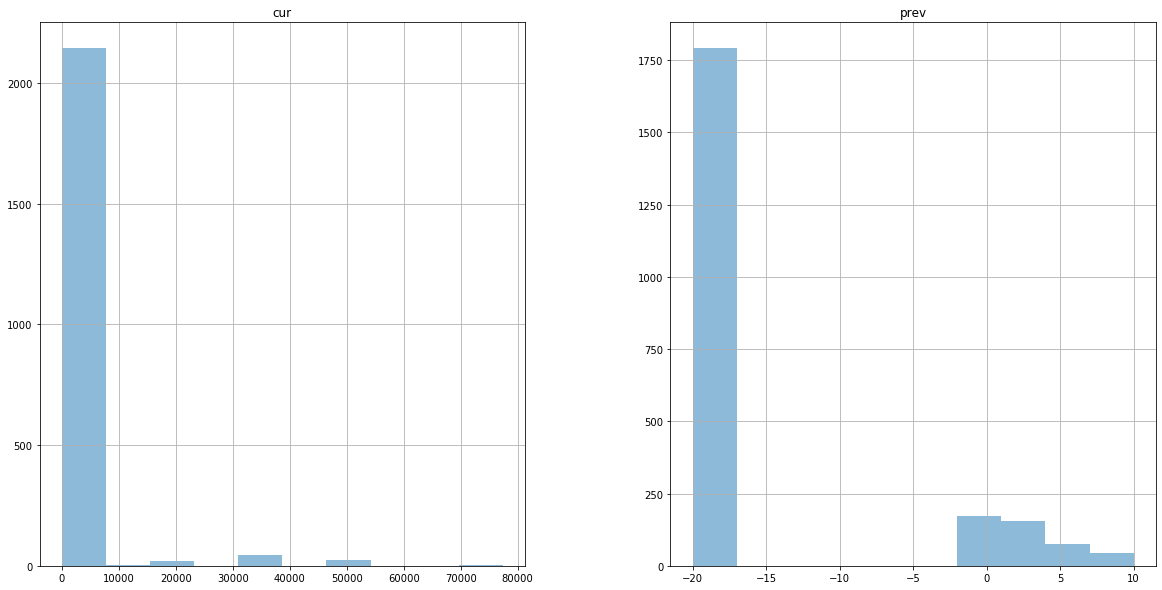

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from db.pg import pg_con
from db.verified import report_row_num_un_uuid
plt.close('all')
plt.figure()

def get_candidates():
    q = """
    select r."rowNumber", c."degreeOfSimilarity", c."iskuId"
    from "Candidates" as c
    inner join "RSKUs" as r on c."rskuId" = r.id
    order by c."rskuId", c."degreeOfSimilarity" DESC;"""
    conn, cursor = pg_con()
    cursor.execute(q)
    recs = cursor.fetchall()
    conn.close()
    return recs

prev_recs = get_candidates()
verified_recs = report_row_num_un_uuid()
cand_res = dict()
for rsku_row_num, dos, un_id in prev_recs:
    if rsku_row_num not in cand_res:
        cand_res[rsku_row_num] = list()
    docs = cand_res[rsku_row_num]
    docs.append((un_id))
vi = list(verified_recs.items())
res = dict()
not_in_res = list()
for rsku_row_num, un_id in vi:
    if rsku_row_num not in cand_res:
        not_in_res.append(rsku_row_num)
        res[rsku_row_num] = -20
        continue
    items = cand_res[rsku_row_num]
    if un_id not in items:
        res[rsku_row_num] = -20
    else:
        res[rsku_row_num] = items.index(un_id)

items = sorted(res.items(), key=lambda t: t[0])
prev_val = [val for col, val in items]
idx1 = [col for col, val in items]
cur_val = [val for col, val in res_plot]
df5 = pd.DataFrame({'prev': prev_val, 'cur': cur_val}, columns=['prev', 'cur'], index=idx1)
# df5.plot.barh(stacked=True, width=.97, figsize=(20,10), rot=0)
df5.hist(alpha=0.5, stacked=True, figsize=(20,10))

In [47]:
df5

,prev,cur
39,-20,0
40,-20,0
41,-20,0
42,-20,48
43,-20,23
...,...,...
16522,-20,5
16528,-20,2
16535,-20,22
16541,-20,16


In [50]:
df5.to_excel("output.xlsx")

# Dosage
- add term
- sku by dosage doc
- 

In [ ]:
len(skus_by_dosage_row[1225])

In [ ]:
# todo: 
from indexes.forms import get_dosage_by_row
# get_dosage_by_row(1494, idx) # 'набор диагностический многокомпонентный (50 определений)'
get_dosage_by_row(1225, idx)

In [ ]:
# todo:
from helpers.skus import show_sku_by_row
# show sku by row number
show_sku_by_row(93090, idx)
# '[5-нок] [таблетки, покрытые оболочкой] [ЛЕК]'

In [ ]:
# todo: вывести в верефицированных номер документа

In [ ]:
# посмотреть на самом деле какая лекарственная форма
# doc dosage [skus]
# ([1225], ['таблетки, покрытые оболочкой'])
from indexes.forms import get_verified_dosage_by_row
get_verified_dosage_by_row(39, verified, idx)
# !!!
sku_in_dosage = 93090 in skus_by_dosage_row[1225]
from indexes.forms import add_dosage_term_list_doc 
# 39 => ([1225], ['таблетки, покрытые оболочкой'])
terms = ['табл', 'табл.', 'п/о']
add_dosage_term_list_doc(terms, 39, verified, idx)

# company row skus

In [ ]:
# 2727
93090 in skus_by_company_row[2696]

In [41]:
from helpers.strings import get_bow
get_bow('ВалентаФармацевтика/ВалентаФарм')
# 3114

['валентафармацевтика/валентафарм']

In [45]:
pcompany = 'ВалентаФармацевтика/ВалентаФарм'
add_terms_docs(pcompany, 3114, idx)

# Добавление всех компаний в индекс

In [7]:
from zones.common import zone_docs, flat_company_zone
from indexes.verified import sku_data_by_price_row
from indexes.company import get_company_row_by_sku_data
company_terms_docs = idx['company_idx']['terms_docs']

for i, (price_i, un_id) in enumerate(verified.items()):
#     v_sku_doc
#     flat company zone
#     ? v_sku_doc in flat company zone
    pname, pcompany = extract_pline(price_i, plist)
    company_zone = zone_docs(pcompany, company_terms_docs)  # company
    flat_skus_company = flat_company_zone(company_zone, skus_by_company_row)
    
    
    sku_row = get_sku_row_by_id(un_id, idx)
    if sku_row == False:
        print(un_id)
        continue
    in_res = sku_row in flat_skus_company

    sku_data = sku_data_by_price_row(price_i, verified, idx)
    company_row = get_company_row_by_sku_data(sku_data, idx)
    
    
#     print('[{}][{}][{}]! [{}] [{}]! - [{}]'.format(in_res, price_i, sku_row, pcompany, company_row, i))
    if not in_res:
        print('[{}][{}][{}]! [{}] [{}]! - [{}]'.format(in_res, price_i, sku_row, pcompany, company_row, i))
        add_terms_docs(pcompany, company_row, idx)

[False][816][34503]! [Завод Медсинтез] [2432]! - [12]
[False][1684][29320]! [Hoffman La Roche/Genentech Inc] [793]! - [27]
[False][1685][96565]! [Hoffman La Roche/Genentech Inc] [2250]! - [28]
[False][1801][54159]! [Материа-Медика] [2638]! - [33]
[False][1883][93975]! [Вифитех] [3054]! - [66]
[False][1889][105272]! [Zdravle] [2306]! - [69]
[False][1932][26040]! [Нижфарм/Макиз-Фарма] [3480]! - [88]
[False][1943][66069]! [Ranbaxy/SUN Pharmaceutical Industries Ltd] [11]! - [98]
[False][1958][60354]! [ПроМед] [3487]! - [109]
[False][2019][89330]! [S.I.F.I.] [3111]! - [131]
[False][2024][66619]! [Merz Pharma/Rottendorf] [3386]! - [136]
[False][2042][4230]! [Jadran] [575]! - [142]
[False][2194][101455]! [Astra Zeneca] [2436]! - [163]
[False][2272][22070]! [Takeda Austria Gmbh/Такеда ООО] [3316]! - [213]
[False][2279][99988]! [Такеда/Глобофарм Фармацойтише] [2997]! - [216]
[False][2291][60217]! [Biocodex] [1548]! - [220]
[False][2391][75899]! [Sanofi-Winthrop Industrie] [1373]! - [251]
[False

In [14]:
from zones.common import zone_docs, flat_dosage_zone
from indexes.verified import sku_data_by_price_row
from indexes.forms import get_dosage_rows, get_dosage_names

def get_sku_row_by_id(un_id: str, idx: dict):
    skus_idx = idx['skus_idx']
    skus_id_rows_idx = skus_idx['rows_id_inv']

    if un_id not in skus_id_rows_idx:
        return False
    sku_row = skus_id_rows_idx[un_id]
    return sku_row
dosage_terms_docs = idx['dosage_idx']['terms_docs']
j = 0
uniq = list()
for i, (price_i, un_id) in enumerate(verified.items()):
    pname, pcompany = extract_pline(price_i, plist)
    dosage_zone = zone_docs(pname, dosage_terms_docs)  # company
    flat_skus_dosage = flat_dosage_zone(dosage_zone, skus_by_dosage_row)
    
    
    sku_row = get_sku_row_by_id(un_id, idx)
    if sku_row == False:
        print(un_id)
        continue
    in_res = sku_row in flat_skus_dosage

    sku_data = sku_data_by_price_row(price_i, verified, idx)
    dosage_row_list = get_dosage_rows(sku_data, idx)
    dosage_name_list = get_dosage_names(sku_data, idx)
    
#     print('[{}][{}][{}]! [{}] [{}]! - [{}]'.format(in_res, price_i, sku_row, pname, dosage_row_list, i))
    if not in_res:
        for rrow in dosage_row_list:
            if rrow in uniq:
                continue
            uniq.append(rrow)
            j += 1
            print('[{}] [{}] [{}] [{}]!'.format(price_i, pname, dosage_row_list, dosage_name_list))
j

[2555] [Альгистоп 15 г. х1] [[237]] [['гранулы гомеопатические']]!
[2619] [Амброксол сироп 15 мг/5мл фл. 100 мл х1] [[421]] [['раствор для приёма внутрь']]!
[2732] [Аминоплазмаль Е 15 % фл. 500 мл. х10] [[1429]] [['раствор для инфузий']]!
[2938] [Амоксициллин капс. 250 мг х20] [[61]] [['таблетки']]!
[3169] [Анатоксин стафилококковый очищенный жидкий амп. х10] [[160]] [['суспензия для подкожного введения']]!
[3205] [Анвимакс капс. набор: (капс.П х10+ капс.P х10) х20] [[548, 548]] [['капсулы', 'капсулы']]!
[3268] [Анестезол супп рект.х10] [[947]] [['суппозитории ректальные']]!
[3304] [Антигриппин Максимум /лимон/ пор. д/пр. р-ра д/пр.внут 5 г х6] [[1752]] [['порошок для приготовления раствора для приема внутрь, [малиновый]']]!
[3348] [Антисептический р-р 95 % фл. 100 мл. х1] [[35]] [['концентрат для приготовления раствора для наружного применения']]!
[3361] [Антистен МВ табл. пролонг п/о плен 35 мг х60] [[318]] [['таблетки с пролонгированным высвобождением, покрытые пленочной оболочкой']

[6782] [Ванкомицин Эльфа пор. д/приг. р-ра д/инф.1000 мг фл. 20 мл х1] [[1325]] [['порошок для приготовления раствора для инфузий']]!
[6789] [Ванкорус лиоф. д/приг. р-ра д/инф. 1000 мг фл. х1] [[1244]] [['лиофилизат для приготовления раствора для инфузий и приема внутрь']]!
[6791] [Ванкоцин фл. 0.5 г. х1] [[1694]] [['лиофилизат для приготовления раствора для инфузий']]!
[7189] [Верапамил табл. пролонг. п/о 240 мг уп.конт.яч-пач.карт х20] [[109]] [['таблетки пролонгированного действия, покрытые оболочкой']]!
[7215] [Веро-Амиодарон р-р.в/в введ  50 мг/мл амп. 3 мл. х5] [[353]] [['раствор для внутривенного введения']]!
[7283] [Веторон Е 2 % фл/кап 20 мл. (водорастворимый) х1] [[422]] [['капли для приёма внутрь']]!
[7558] [Винпоцетин-Акос конц д/пр. р-р д/инф 0.5 % амп. 2 мл. х10] [[1311]] [['концентрат для приготовления раствора для инфузий']]!
[7611] [Виталипид Н детский амп. 10 мл. х10] [[48]] [['эмульсия для инфузий']]!
[12121] [Имодиум Экспресс табл-лиофилизат 2 мг х10] [[289]] [['таб

90

In [8]:
items = [
    ('лиоф. д/приг. р-ра д/инф.', 2244),
    ('табл. шип', 2373),
    ('пор. лиоф. д/-ра инъекц.', 2375),
    ('табл пролонг', 2389),
    ('сусп. внутр. пр', 2429),
    ('табл. жев.', 2436),
    ('р-р п/в введ.', 2452),
    ('капс. пролонг.', 2555),
    ('капс. пролонг. капс.пролонг.', 2597),
    ('р-р в/в введ.', 2599),
    ('р-р д/вн.пр.и ингал.', 2600),
    ('р-р д/пр. внутр.', 2615),
    ('супп. рект', 2651),
    ('драже', 2690),
    ('таб', 2795),
    ('р-р наруж.пр.и ингал.', 2885),
    ('р-р', 2886),
    ('р-р', 2908),
    ('табл.', 2910),
    ('пор. д/ра-ра в/в введ', 2918),
    ('гран. д/сусп.', 2933),
    ('табл.', 2949),
    ('пор. д/приг. р-ра в/в', 2983),
    ('супп. рект.', 3076),
    # [3169] [Анатоксин стафилококковый очищенный жидкий амп. х10] [[160]] [['суспензия для подкожного введения']]!
    ('табл.', 3178),
    # ![3205] [Анвимакс капс. набор: (капс.П х10+ капс.P х10) х20] [[548, 548]] [['капсулы', 'капсулы']]!
    ('табл.', 3215),
    ('р-р масл. в/м введ', 3255),
    ('пор. д/инг. дозир.', 3275), 
    ('/грейпфрут/ табл. шип', 3291),
    ('/малина/ табл. шип', 3294),
    ('/мед-лимон/ пор. д/пр. р-ра', 3295),
    ('/ромашка/ пор. д/пр. р-ра', 3298),
    ('/лимон/ пор. д/пр. р-ра д/пр.внут', 3302),
    # [3304] [Антигриппин Максимум /лимон/ пор. д/пр. р-ра д/пр.внут 5 г х6] [[1752]] [['порошок для приготовления раствора для приема внутрь, [малиновый]']]!
    ('/мед-лимон/ пор. д/пр. р-ра д/пр.внут', 3310),
# [3348] [Антисептический р-р 95 % фл. 100 мл. х1] [[35]] [['концентрат для приготовления раствора для наружного применения']]!
# [3361] [Антистен МВ табл. пролонг п/о плен 35 мг х60] [[318]] [['таблетки с пролонгированным высвобождением, покрытые пленочной оболочкой']]!
# [3364] [Антифлу Кидс пор. д/приг. р-ра д/пероральн. прим. х5] [[420]] [['порошок для приготовления раствора для приёма внутрь']]!
# [3404] [Апилак Гриндекс табл. подъязычн. 10 мг х25] [[768]] [['таблетки подъязычные']]!
# [3408] [Апис-плюс супп.  х6] [[404]] [['суппозитории ректальные гомеопатические']]!
# [3427] [Апротекс лиоф. д/р-р в/в введ. 10000 АТрЕ фл. х10] [[1578]] [['лиофилизат для приготовления раствора для внутривенного введения']]!
# 366cda17-7b3b-47b1-9be0-babeceec6960
# [3521] [Аркетал Ромфарм р-р инф., в/м введ. 50 мг/мл амп. 2 мл. х10] [[946]] [['раствор для инфузий и внутримышечного введения']]!
# [3616] [Артрозилен аэроз. 15 % 25 мл. х1] [[228]] [['пена для наружного применения']]!
# [3619] [Артрозилен капс. 320 мг х10] [[249]] [['капсулы с пролонгированным высвобождением']]!
# [3681] [Асковит /апельсин/ табл. шип пенал 1 г. х10] [[147]] [['таблетки шипучие, [апельсиновые]']]!
# [3683] [Асковит /лимон/ табл. шип х10] [[586]] [['таблетки шипучие, [лимонные]']]!
# [3905] [Аспикор табл. п/о киш.раст. 100 мг х90] [[471]] [['таблетки кишечнорастворимые, покрытые пленочной оболочкой']]!
# [3906] [Аспинат Кардио табл. п/о киш.раст. 100 мг х30] [[1442]] [['таблетки покрытые кишечнорастворимой оболочкой']]!
# [3925] [Аспирин Экспресс табл шип. 500 мг х12] [[267]] [['таблетки шипучие']]!
# [3929] [Асталин аэроз. 15 г. (100мкг/200доз сальбутамол) х1] [[574]] [['аэрозоль для ингаляций дозированный']]!
# [3945] [Астрасепт /ч.смород.-ментол/ табл. д/рассас. х16] [[1000]] [['таблетки для рассасывания [черносмородиново-ментоловые]']]!
# [4054] [Атероклефит капли в пенале 50 мл. х1] [[1205]] [['экстракт для приема внутрь [жидкий]']]!
# [4137] [Атрикан 250 капс. киш.раст. 250 мг х8] [[378]] [['капсулы кишечнорастворимые']]!
# [4140] [Атровент р-р д/ингал 0.25 мг/мл 20 мл. х1] [[134]] [['раствор для ингаляций']]!
# [4188] [Афлодерм мазь 20 г. х1] [[274]] [['крем для наружного применения']]!
# [4194] [Афлубин капли гомеопат. фл. 20 мл. х1] [[1233]] [['спрей назальный']]!
# [4196] [Афлубин табл. подъяз. гомеопат. х48] [[133]] [['таблетки подъязычные гомеопатические']]!
# [4209] [Аффинолейкин лиоф. д/р-р д/пк. введ. 1 ЕД амп. х10] [[1261]] [['лиофилизат для приготовления раствора для подкожного введения']]!
# [4302] [Ацетилцистеин Канон гран. д/приг р-ра д/внут. пр. 100 мг пакеты 3г х20] [[1726]] [['гранулы для приготовления раствора для приёма внутрь']]!
# [4383] [Ацилакт супп.  х10] [[1206]] [['суппозитории вагинальные']]!
# [4408] [АЦЦ Актив пор. д/внут. пр. 600 мг. х10] [[308]] [['порошок для приёма внутрь']]!
# [4451] [Багульника болотного побеги пак. 50 г. х1] [[572]] [['сырье растительное измельченное']]!
# [4454] [Бадан корневища ф/п. 1.5 г. х20] [[1107]] [['корневища-порошок']]!
# [4460] [Бадяга пор. 10 г. х1] [[595]] [['порошок для наружного применения']]!
# [4463] [Бадяга пор. 5 г. х1] [[144]] [['порошок для приготовления суспензии для наружного применения']]!
# [4502] [Бактериофаг Клебсиелл Поливалентный очищ.жидк фл. 20 мл. х4] [[218]] [['раствор для приема внутрь, местного и наружного применения']]!
# [4509] [Бактериофаг Сальмонеллезный групп ABCDE р-р фл. 100 мл. х1] [[452]] [['раствор для приема внутрь и ректального введения']]!
# [4809] [Беклазон ЭКО Легкое Дыхание аэроз. 200 доз (250мкг/1доза) х1] [[1600]] [['аэрозоль для ингаляций дозированный активируемый вдохом']]!
# [4930] [Бенатекс табл. ваг. 20 мг х15] [[1253]] [['таблетки вагинальные']]!
# [4969] [Бензилпенициллин Na 1000000 ЕД фл. х1] [[1175]] [['порошок для приготовления раствора для инъекций']]!
# [4974] [Бензилпенициллин Na пор. д/приг. р-ра в/м 1000000 ЕД фл. х1] [[265]] [['порошок для приготовления раствора для инъекций и местного применения']]!
# [5060] [Бессмертника песчаного цветки 30 г. х1] [[17]] [['сырье растительное']]!
# [5126] [Бетадин р-р д/местн,наруж.пр 10 % фл. 1000 мл. х1] [[587]] [['раствор для местного и наружного применения']]!
# [5143] [Беталок Зок замедл. высв табл. п/о 25 мг х14] [[685]] [['таблетки с пролонгированным высвобождением, покрытые оболочкой']]!
# [5169] [Бетасерк табл. 24 мг уп.яч.контур. х60.] [[184]] [['таблетки, диспергируемые в полости рта']]!
# [5174] [Бетаспан Депо сусп д/инъек.7 мг/мл амп. 1 мл х5] [[104]] [['суспензия для инъекций']]!
# [5569] [Биолек Туберкулин ППД-Л р-р внутрикож. введ.2 ТЕ/доза 3 мл(30 доз) х10] [[280]] [['раствор для внутрикожного введения']]!
# [5629] [Бисакодил табл. п/о киш.раст. 5 мг уп.конт.яч-пач.карт х30] [[1550]] [['таблетки, покрытые кишечнорастворимой оболочкой']]!
# [5640] [Бисакодил-Хемофарм табл. киш-раств. сах. об 5 мг х30] [[1737]] [['таблетки покрытые кишечнорастворимой сахарной оболочкой']]!
# [5729] [Бифидумбактерин лиоф. д/пр сусп фл. 5 доз х10] [[174]] [['лиофилизат для приготовления суспензии для приема внутрь и местного применения']]!
# [5741] [Бифидумбактерин супп х10] [[1092]] [['суппозитории вагинальные и ректальные']]!
# [5749] [Бифидумбактерин сухой фл. 5 доз (старый шк.) х10] [[819]] [['лиофилизат для приготовления раствора для приема внутрь и местного применения']]!
# [5769] [Бификол лиоф. д/приг сусп д/внут. пр фл. 5 доз х10] [[1512]] [['лиофилизат для приготовления суспензии для приема внутрь']]!
# [5770] [Бификол сухой фл. 5 доз х10] [[1482]] [['лиофилизат для приготовления суспензии для приема внутрь измельченный']]!
# [5796] [Бициллин-3 600000 ЕД х50] [[1527]] [['порошок для приготовления суспензии для внутримышечного введения']]!
# [5840] [Блогир-3 табл. д/рассас. 5 мг х10] [[329]] [['таблетки, диспергируемые в полости рта']]!
# [5900] [Бонефос р-р 60 мг/мл амп. 5 мл. х5] [[271]] [['концентрат для приготовления раствора для внутривенного для введения']]!
# [5917] [Борная кислота пор. пак. 10 г. х1] [[972]] [['раствор для местного применения, [спиртовой]']]!
# [5932] [Борной к-ты р-р спирт. 3 % фл. 10 мл. х1] [[295]] [['раствор для наружного применения [спиртовой]']]!
# [6155] [Бромгексин Гриндекс табл. д/детей 4 мг х50] [[633]] [['таблетки [для детей]']]!
# [6275] [Брусника листья ф/п. 1.5 г. х20] [[1532]] [['листья-порошок']]!
# [6282] [Буденит Стери-Неб сусп. д/ингал. 0.25 мг/мл 2 мл. х20] [[1443]] [['суспензия для ингаляций дозированная']]!
# [6304] [Бупивакаин Гриндекс Спинал р-р д/интратекального введ 5 мг/мл амп. 4 мл. х5] [[1259]] [['раствора для интратекального введения']]!
# [6444] [Вазелин медицинский 25 г. х1] [[1256]] [['мазь для наружного применения']]!
# [6516] [Вайдаза лиоф. д/подкож. введ. 100 мг. фл. 200 мг. х1] [[496]] [['лиофилизат для приготовления суспензии для подкожного введения']]!
# [6521] [Вакцина антирабич.культурн. конц.очищ. 2.5 МЕ амп. 1 мл. х5] [[558]] [['лиофилизат для приготовления раствора для внутримышечного введения']]!
# [6523] [Вакцина Ваксигрип шприц 0.5 мл (1 доза) х1] [[1166]] [['суспензия для внутримышечного и подкожного введения']]!
# [6524] [Вакцина Гонококковая 1 мл. х10] [[1031]] [['суспензия для внутримышечного введения']]!
# [6529] [Вакцина Гриппол амп. 0.5 мл. (1 доз) х10] [[659]] [['раствор для внутримышечного и подкожного введения']]!
# [6539] [Вакцина Ультравак гриппоз. фл. 0.5 мл. (1 доза) х1] [[1503]] [['лиофилизат для приготовления раствора для интраназального введения']]!
# [6668] [Валидол капс. 100 мг х20] [[1373]] [['капсулы подъязычные']]!
# [6782] [Ванкомицин Эльфа пор. д/приг. р-ра д/инф.1000 мг фл. 20 мл х1] [[1325]] [['порошок для приготовления раствора для инфузий']]!
# [6789] [Ванкорус лиоф. д/приг. р-ра д/инф. 1000 мг фл. х1] [[1244]] [['лиофилизат для приготовления раствора для инфузий и приема внутрь']]!
# [6791] [Ванкоцин фл. 0.5 г. х1] [[1694]] [['лиофилизат для приготовления раствора для инфузий']]!
# [7189] [Верапамил табл. пролонг. п/о 240 мг уп.конт.яч-пач.карт х20] [[109]] [['таблетки пролонгированного действия, покрытые оболочкой']]!
# [7215] [Веро-Амиодарон р-р.в/в введ  50 мг/мл амп. 3 мл. х5] [[353]] [['раствор для внутривенного введения']]!
# [7283] [Веторон Е 2 % фл/кап 20 мл. (водорастворимый) х1] [[422]] [['капли для приёма внутрь']]!
# [7558] [Винпоцетин-Акос конц д/пр. р-р д/инф 0.5 % амп. 2 мл. х10] [[1311]] [['концентрат для приготовления раствора для инфузий']]!
# [7611] [Виталипид Н детский амп. 10 мл. х10] [[48]] [['эмульсия для инфузий']]!
# [12121] [Имодиум Экспресс табл-лиофилизат 2 мг х10] [[289]] [['таблетки-лиофилизат']]!
# [14419] [Кордафлекс РД контр. высв табл. п/о 40 мг х30] [[1425]] [['таблетки с модифицированным высвобождением, покрытые пленочной оболочкой']]!
# [15123] [Лайфферон лиоф. 1000000 МЕ х5] [[992]] [['раствор для внутримышечного, субконъюнктивального введения и закапывания в глаз']]!
# [15324] [Лактожиналь капс. ваг фл. х14] [[1768]] [['капсулы вагинальные']]!
# [15342] [Ламизил Уно р-р наружн. пр. 1 % 4 г. х1] [[940]] [['раствор для наружного применения [пленкообразующий]']]!
# [15347] [Ламиктал табл. жеват/раств. 5 мг х30] [[831]] [['таблетки жевательные/диспергируемые']]!

# [16095] [Лемод пор. д/инъекц. в/в, в/м 125 мг фл. 2 мл. х1 (РУ)] [[398]] [['лиофилизат для приготовления раствора для внутривенного и внутримышечного введения']]!

#     ('',),
#     ('',),
#     ('',),
#     ('',),
#     ('',),
#     ('',),
#     ('',),
#     ('',),

        ('конц. д/пр.р-ра д/инф.', 2235),

    ('р-р д/инф.', 1688),
    ('табл. д/рассас.', 1801),
    ('капс капс.', 1802),
    ('р-р д/ в/м введ.', 1808),
    ('табл. табл', 1823),
    ('крем', 1840),
    ('апельсин /апельсин/ пор. пор', 1859),
    ('ананас /ананас/ табл табл. д/рассас.', 1860),
    ('апельсин /апельсин/ табл табл. д/рассас.', 1861),
    ('лимон /лимон/ табл табл. д/рассас.', 1865),
    ('мед-лимон /мед-лимон/ табл табл. д/рассас.', 1866),
    ('ментол-эвкалипт /ментол-эвкалипт/ табл табл. д/рассас.', 1868),
    ('р-р д/инъек.', 1884),
    ('р-р д/местн,наруж.пр', 1917),
    ('пор. д/приг. р-ра в/в', 1923),
    ('пор. д/приг. сусп. д/пр. внут.', 1952),
    ('капс.', 1958),
    
    ('р-р в/в, в/м введ',2181),
    
    
]
for t, ver_price_i in items:
    add_dosage_term_list_doc(get_bow(t), ver_price_i, verified, idx)
# => -1
terms = get_bow('лиоф. д/приг. сусп д/инф')
ver_price_i = 1679
add_dosage_term_list_doc(terms, ver_price_i, verified, idx)
# 1270 => 774
add_dosage_term_list_doc(['табл', 'табл.'], 817, verified, idx)
terms = get_bow('конц-т д/пр.р-ра в/в')
add_dosage_term_list_doc(terms, 1672, verified, idx) # => 773

[1694] ['лиофилизат для приготовления раствора для инфузий']
[лиоф.] not exists!
[д/инф.] not exists!
[267] ['таблетки шипучие']
[шип] not exists!
[618] ['лиофилизат для приготовления раствора для внутрисосудистого введения']
[пор.] not exists!
[д/-ра] not exists!
[инъекц.] not exists!
[1756] ['таблетки пролонгированного действия']
[пролонг] not exists!
[152] ['суспензия для приёма внутрь']
[сусп.] not exists!
[внутр.] not exists!
[пр] not exists!
[1059] ['таблетки жевательные']
[жев.] not exists!
[1386] ['раствор для подкожного введения']
[р-р] not exists!
[п/в] not exists!
[введ.] not exists!
[237] ['гранулы гомеопатические']
[капс.] not exists!
[пролонг.] not exists!
[187] ['капсулы пролонгированного действия']
[капс.пролонг.] not exists!
[353] ['раствор для внутривенного введения']
[в/в] not exists!
[1502] ['раствор для приема внутрь и ингаляций']
[д/вн.пр.и] not exists!
[ингал.] not exists!
[421] ['раствор для приёма внутрь']
[д/пр.] not exists!
[947] ['суппозитории ректальные']
[

In [12]:
get_bow('конц-т д/пр.р-ра в/в')

['конц-т', 'д/пр.р-ра', 'в/в']

# trade_name

In [4]:
from zones.common import zone_docs, flat_tn
tn_terms_docs = idx['tn_idx']['terms_docs']
from indexes.verified import sku_data_by_price_row
def get_sku_row_by_id(un_id: str, idx: dict):
    skus_idx = idx['skus_idx']
    skus_id_rows_idx = skus_idx['rows_id_inv']
    if un_id not in skus_id_rows_idx:
        return False
    sku_row = skus_id_rows_idx[un_id]
    return sku_row

j = 0
for i, (price_i, un_id) in enumerate(verified.items()):
    pname, pcompany = extract_pline(price_i, plist)
    tn_zone = zone_docs(pname, tn_terms_docs)  # company
    flat_skus_tn = flat_tn(tn_zone)
    
    
    sku_row = get_sku_row_by_id(un_id, idx)
    if sku_row == False:
        print(un_id)
        continue
    in_res = sku_row in flat_skus_tn

    sku_data = sku_data_by_price_row(price_i, verified, idx)
    
#     tn_row = get_tn_row_by_sku_data(sku_data, idx)
    
    
#     print('[{}][{}][{}]! [{}] [{}]! - [{}]'.format(in_res, price_i, sku_row, pcompany, company_row, i))
    if not in_res:
        j += 1
        print('{}, [{}] [{}]'.format(sku_row, pname, sku_data['trade_name']))
#         add_terms_docs(pcompany, company_row, idx)
j

137847, [АджиКОЛД Плюс мазь 20 г х1] [аджиколд-плюс]
63593, [Азелликапс-вита /рыбий жир/ капс. 500 мг х50] [рыбий жир]
60354, [Азитромицин капс. 250 мг х6] [азитромицин-акрихин]
92500, [Азитромицин капс. 250 мг х6**] [азитромицин-вертекс]
132763, [Амброксол ретард капс. пролонг. действ 75 мг х10] [амброгексал]
8800, [Амброксол-Врамед сироп 15 мг/5мл фл. 100 мл. (мерн. стакан) х1] [амброксол врамед]
127213, [Амикацина пор. д/приг. р-ра в/в, в/м фл. 1 г. х50] [амикацин]
125286, [Аминоплазмаль-Гепа р-р д/инф. 10 % фл. 500 мл х10] [аминоплазмаль гепа]
15992, [Аминоплазмаль-Гепа р-р д/инф. 10 % фл. 500 мл. х1] [аминоплазмаль гепа]
29063, [Аминосол Нео E р-р д/инф. 10 % фл. 500 мл. (компл держат д/флакона) х1] [аминосол-нео е]
143340, [Аминосол Нео р-р 10 % фл. 500 мл. х1] [аминосол-нео]
6500, [Аминосол Нео р-р 15 % фл. 500 мл. х1] [аминосол-нео]
516, [Амиодарон табл. 200 мг уп.яч.конт х30] [амиодарон-сз]
47061, [Амиодарон табл. 200 мг фл. х30] [амиодарон-сз]
14443, [Амиодарон-Сандоз табл. 2

128791, [Венлафаксин табл. 37,5 мг х10] [венлафаксин-алси]
71851, [Венлафаксин табл. 37,5 мг х20] [венлафаксин-алси]
73501, [Венлафаксин табл. 37,5 мг х30] [венлафаксин-алси]
40452, [Венлафаксин табл. 37,5 мг х40] [венлафаксин-алси]
65124, [Венлафаксин табл. 37,5 мг х50] [венлафаксин-алси]
42676, [Венлафаксин табл. 75 мг х10] [венлафаксин-алси]
139783, [Венлафаксин табл. 75 мг х20] [венлафаксин-алси]
122410, [Венлафаксин табл. 75 мг х40] [венлафаксин-алси]
117911, [Венлафаксин табл. 75 мг х50] [венлафаксин-алси]
87620, [Винпоцетин табл. 5 мг х20] [винпоцетин-сар]
6735, [Винпоцетин табл. 5 мг х30] [винпоцетин-алси]
10884, [Винпоцетин-Акри табл. 5 мг х50] [винпоцетин-акрихин]
37671, [Леветирацетам Акрихин табл п/о плен 250 мг х30] [леветирацетам-акрихин]
18544, [Леветирацетам Акрихин табл п/о плен 500 мг х30] [леветирацетам-акрихин]
52088, [Лидокаина г/х капли глаз. 2 % тюб-кап. 1.3 мл. х5] [лидокаин]
92330, [Лидокаина г/х р-р 10 % амп. 2 мл. х10] [лидокаин]
51244, [Лизиноприл табл. 10 м

148

In [5]:
add_to_tn_index('АджиКОЛД Плюс', [137847], idx)
add_to_tn_index('5-фторурацил', [101524, 47268, 96920, 71248, 4864], idx)

[аджиколд][137847] was added 
[плюс][137847] was added 
[!] there is a doc[101524] in term[5-фторурацил]
[!] there is a doc[47268] in term[5-фторурацил]
[!] there is a doc[96920] in term[5-фторурацил]
[!] there is a doc[71248] in term[5-фторурацил]
[!] there is a doc[4864] in term[5-фторурацил]


# Dicts

In [ ]:
from helpers.strings import get_bow

# tn 
# from indexes.tn import add_to_tn_index
def add_to_tn_index(terms, docs, idx):
    terms_docs = idx['tn_idx']['terms_docs']
    for term in get_bow(terms):
        # get existing item or new list
        term_docs = term in terms_docs and terms_docs[term] or list()
        for doc in docs:
            if doc in term_docs:
                print('[!] there is a doc[{}] in term[{}]'.format(doc, term))
                continue
            # can optimizate, where insert?
            term_docs.append(doc)
            terms_docs[term] = sorted(term_docs)
            print('[{}][{}] was added '.format(term, doc))

add_to_tn_index('5-фторурацил', [101524, 47268, 96920, 71248, 4864], idx)
add_to_tn_index('АджиКОЛД Плюс', [137847], idx)
add_to_tn_index('Азелликапс-вита /рыбий жир/ рыбий жир', [63593], idx)
add_to_tn_index('Азитромицин', [60354], idx)
add_to_tn_index('Азитромицин', [92500], idx)
add_to_tn_index('Амброксол ретард', [132763], idx)
add_to_tn_index('Амброксол-Врамед', [8800], idx)
add_to_tn_index('Амикацина', [127213], idx)
add_to_tn_index('Аминоплазмаль-Гепа', [125286, 15992], idx)
add_to_tn_index('Аминосол Нео E', [29063], idx)
add_to_tn_index('Аминосол Нео', [143340, 6500], idx)
add_to_tn_index('Амиодарон', [516, 47061], idx)
add_to_tn_index('Амиодарон-Сандоз', [14443, 44622], idx)
add_to_tn_index('амлодипин-прана', [26427, 134099, 134099], idx)
add_to_tn_index('Аммиака', [71026, 61221, 121611, 50320, 89750, 15735, 89750, 121204, 28008, 95999, 3877, 135218, 135218, 81691], idx)
add_to_tn_index('Антигриппин', [121654, 15568, 116255, 86599, 116085, 116255, 124723, 63452, 122873, 121298, 53512, 120657, 115584], idx)


# dosage
from indexes.forms import add_dosage_term_list_doc 
terms = ['табл', 'табл.', 'п/о']
add_dosage_term_list_doc(terms, 39, verified, idx)
# 45
row = 45
t = 'конц-т д/приг. р-ра инфуз.'
terms = get_bow(t)
print(row, terms)
add_dosage_term_list_doc(terms, 45, verified, idx)
add_dosage_term_list_doc(['табл', 'табл.', 'п/о', 'плен'], 58, verified, idx)


# company

pcompany = 'ВалентаФармацевтика/ВалентаФарм'
add_terms_docs(pcompany, 3114, idx)